# Netflix's Global Strategy

This notebook analyzes the characteristics and changes in Netflix US' content library during international expansion

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the Data</a></span></li><li><span><a href="#Cleaning-the-Data" data-toc-modified-id="Cleaning-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning the Data</a></span></li><li><span><a href="#Analyzing-the-Data" data-toc-modified-id="Analyzing-the-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyzing the Data</a></span><ul class="toc-item"><li><span><a href="#Metrics-for-Entire-US-Content-Library" data-toc-modified-id="Metrics-for-Entire-US-Content-Library-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Metrics for Entire US Content Library</a></span><ul class="toc-item"><li><span><a href="#Cast,-Genre,-Type,-and-Country-of-Production-Counts" data-toc-modified-id="Cast,-Genre,-Type,-and-Country-of-Production-Counts-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Cast, Genre, Type, and Country of Production Counts</a></span></li><li><span><a href="#Country-of-Production-Over-Time" data-toc-modified-id="Country-of-Production-Over-Time-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Country of Production Over Time</a></span></li><li><span><a href="#Genre-Analysis" data-toc-modified-id="Genre-Analysis-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Genre Analysis</a></span></li><li><span><a href="#Content-Age-and-Ratings-Metrics" data-toc-modified-id="Content-Age-and-Ratings-Metrics-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Content Age and Ratings Metrics</a></span></li></ul></li><li><span><a href="#Metrics-for-Netflix-Originals-subset-in-the-US-Content-Library" data-toc-modified-id="Metrics-for-Netflix-Originals-subset-in-the-US-Content-Library-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Metrics for Netflix Originals subset in the US Content Library</a></span><ul class="toc-item"><li><span><a href="#Cast,-Genre,-Type,-and-Country-of-Production-Counts" data-toc-modified-id="Cast,-Genre,-Type,-and-Country-of-Production-Counts-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Cast, Genre, Type, and Country of Production Counts</a></span></li><li><span><a href="#Country-of-Production-Over-Time" data-toc-modified-id="Country-of-Production-Over-Time-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Country of Production Over Time</a></span></li><li><span><a href="#Genre-Analysis" data-toc-modified-id="Genre-Analysis-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Genre Analysis</a></span></li><li><span><a href="#Ratings-Metrics" data-toc-modified-id="Ratings-Metrics-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Ratings Metrics</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

In the last four years, Netflix's international expansion has been aggressive and marked in comparison to its competitors. Though the company has been famously opaque about how they quantify and measure the success of licensed and original content on its sprawling platform, a quick dive into its US region content library - and how it has changed over the years - can give us an idea of Netflix's recent business strategy and broader consumer tastes algorithmically-derived from its 200 million+ subscriber base.

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.io import write_image
from datetime import datetime
from collections import Counter
import re


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

## Loading the Data

In [2]:
# loading in the data
titles_df = pd.read_csv('/Users/rp/Projects/Netflix/netflix_titles.csv')

In [3]:
# checking the output of the loaded data
titles_df

# checking the dtypes of the data
titles_df.dtypes

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## Cleaning the Data

In [4]:
# creating a 'year' column
titles_df['year_added'] = titles_df['date_added'].apply(lambda x : x.split(',')[-1] if pd.notnull(x) else x)
titles_df['year_added'] = titles_df['year_added'].apply(lambda x : x if x is not None else '2021')
titles_df['year_added'] = titles_df['year_added'].apply(lambda x : int(x) if pd.notnull(x) else x)

# formatting date column for analysis
titles_df['date_added'] = pd.to_datetime(titles_df['date_added'], errors='coerce')
titles_df['date_added'] = titles_df['date_added'].apply(lambda x: x.strftime('%Y-%m') if pd.notnull(x) else x)

# creating a 'content_age' column
titles_df['content_age'] = titles_df['year_added'] - titles_df['release_year']

# remapping content ratings to easier-to-understand age groups
ratings_to_age_dict = {'G':'young kids', 'TV-Y': 'young kids','TV-G':'young kids', 'PG':'older kids', 'TV-PG':'teens', 'TV-Y7':'older kids','TV-Y7-FV':'older kids', 'TV-G':'older kids', 'PG-13':'teens','TV-14':'teens', 'R':'adults','NC-17':'adults','TV-MA':'adults', 'NR':np.nan, 'UR':np.nan}
titles_df['age_group'] = titles_df['rating'].replace(ratings_to_age_dict)

# converting columns with multiple values into lists
titles_df['cast'] = titles_df['cast'].str.strip('').str.split(',')
titles_df['listed_in'] = titles_df['listed_in'].str.strip('').str.split(',')
titles_df['country'] = titles_df['country'].str.strip(' ,').str.split(',')

# checking the newly formatted dataframe
titles_df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,content_age,age_group
0,s1,TV Show,3%,NaN,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],2020-08,2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...,2020.0,0.0,adults
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016-12,2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,2016.0,0.0,adults
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2018-12,2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",2018.0,7.0,adults
3,s4,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2017-11,2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi...",2017.0,8.0,teens
4,s5,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],2020-01,2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,2020.0,12.0,teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...","[Sweden, Czech Republic, United Kingdom, De...",2020-10,2005,TV-MA,99 min,"[Dramas, International Movies]",When Lebanon's Civil War deprives Zozo of his ...,2020.0,15.0,adults
7783,s7784,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",[India],2019-03,2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...,2019.0,4.0,teens
7784,s7785,Movie,Zulu Man in Japan,NaN,[Nasty C],NaN,2020-09,2019,TV-MA,44 min,"[Documentaries, International Movies, Music ...","In this documentary, South African rapper Nast...",2020.0,1.0,adults
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"[Adriano Zumbo, Rachel Khoo]",[Australia],2020-10,2019,TV-PG,1 Season,"[International TV Shows, Reality TV]",Dessert wizard Adriano Zumbo looks for the nex...,2020.0,1.0,teens


## Analyzing the Data

### Metrics for Entire US Content Library

In [5]:
# taking a quick look at the basic metrics of the data
titles_df.describe(include='all')[1:4]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,content_age,age_group
unique,7787,2,7787,4049,6831,678,100,NaN,14,216,492,7769,NaN,NaN,4
top,s7223,Movie,Olmo & the Seagull,"Raúl Campos, Jan Suter",[David Attenborough],[United States],2019-11,NaN,TV-MA,1 Season,[Documentaries],Multiple women report their husbands as missin...,NaN,NaN,adults
freq,1,5377,1,18,18,2556,272,NaN,2863,1608,334,3,NaN,NaN,3531


#### Cast, Genre, Type, and Country of Production Counts

In [6]:
# processing counts for cast, genres, types (Movies or TV Shows), and countries of production
cast_df = titles_df[titles_df['cast'].isnull() == False]
cast_array = np.array([item.strip() for row in cast_df['cast'].values for item in row])
cast_counts = pd.Series(dict(Counter(cast_array).most_common()))

genre_df = titles_df[titles_df['listed_in'].isnull() == False]
genre_array = np.array([item.strip() for row in genre_df['listed_in'].values for item in row])
genre_counts = pd.Series(dict(Counter(genre_array).most_common()))

type_df = titles_df[titles_df['type'].isnull() == False]


type_array = np.array([row.strip() for row in type_df['type'].values])
type_counts = pd.Series(dict(Counter(type_array).most_common()))

country_df = titles_df[titles_df['country'].isnull() == False]
country_array = np.array([item.strip() for row in country_df['country'].values for item in row])
country_counts = pd.Series(dict(Counter(country_array).most_common())).reset_index()

# looking at the top 25 count totals for individual cast members, genres, and countries of production
cast_counts[:25]
genre_counts[:25]
country_counts[:25]

# looking at the total type counts
type_counts

# setting 'top 10', 'top 15' and 'top 25' countries by total content count for future analysis
top_10 = country_counts.loc[:9, 'index'].values
top_15 = country_counts.loc[:14, 'index'].values
top_25 = country_counts.loc[:24, 'index'].values

# checking the 'top 10' array output as an example
top_10

Anupam Kher            42
Shah Rukh Khan         35
Naseeruddin Shah       30
Om Puri                30
Takahiro Sakurai       29
Akshay Kumar           29
Boman Irani            27
Amitabh Bachchan       27
Paresh Rawal           27
Yuki Kaji              27
Kareena Kapoor         25
John Cleese            24
Vincent Tong           24
Andrea Libman          24
Tara Strong            22
Ashleigh Ball          22
Ajay Devgn             21
Nawazuddin Siddiqui    21
Samuel L. Jackson      20
Kay Kay Menon          20
Salman Khan            20
Daisuke Ono            20
Nicolas Cage           20
Fred Tatasciore        19
Gulshan Grover         19
dtype: int64

International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  525
Thrillers                    491
Crime TV Shows               427
Kids' TV                     414
Docuseries                   353
Romantic TV Shows            333
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
British TV Shows             232
Reality TV                   222
Sci-Fi & Fantasy             218
Sports Movies                196
Korean TV Shows              150
TV Action & Adventure        150
dtype: int64

,index,0
0,United States,3297
1,India,990
2,United Kingdom,723
3,Canada,412
4,France,349
5,Japan,287
6,Spain,215
7,South Korea,212
8,Germany,199
9,Mexico,154


Movie      5377
TV Show    2410
dtype: int64

array(['United States', 'India', 'United Kingdom', 'Canada', 'France',
       'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico'], dtype=object)

In [7]:
# processing counts by type and country
movie_df = type_df[type_df.type == 'Movie'].dropna(subset=['country'])
tv_df = type_df[type_df.type == 'TV Show'].dropna(subset=['country'])

movie_country_array = np.array([item.strip() for row in movie_df['country'].values for item in row])
movie_country_counts = pd.Series(dict(Counter(movie_country_array).most_common()))

tv_country_array = np.array([item.strip() for row in tv_df['country'].values for item in row])
tv_country_counts = pd.Series(dict(Counter(tv_country_array).most_common()))

# taking a look at type counts by country
print('Movies by Country:')
movie_country_counts[:25]
top_movie_countries = movie_country_counts[:25]

print('TV Shows by Country:')
tv_country_counts[:25]
top_tv_countries = tv_country_counts[:25]

# taking a look at the most common duration for both movies and tv shows
movie_df['duration'].value_counts()
tv_df['duration'].value_counts()

Movies by Country:


United States     2431
India              915
United Kingdom     467
Canada             286
France             265
Spain              158
Germany            157
Japan              103
China              102
Mexico             101
Egypt               97
Hong Kong           97
Australia           84
Turkey              80
Indonesia           77
Philippines         77
Belgium             74
Nigeria             68
Italy               67
Argentina           64
Brazil              59
South Korea         55
South Africa        44
Thailand            43
Netherlands         37
dtype: int64

TV Shows by Country:


United States     866
United Kingdom    256
Japan             184
South Korea       157
Canada            126
France             84
India              75
Taiwan             70
Australia          60
Spain              57
Mexico             53
China              45
Germany            42
Brazil             29
Turkey             28
Colombia           28
Italy              23
Thailand           22
Singapore          21
Argentina          18
Russia             17
Egypt              13
Denmark            13
Ireland            12
Belgium            11
dtype: int64

90 min     135
93 min     128
94 min     124
91 min     120
95 min     119
          ... 
37 min       1
193 min      1
214 min      1
18 min       1
3 min        1
Name: duration, Length: 195, dtype: int64

1 Season      1373
2 Seasons      353
3 Seasons      174
4 Seasons       87
5 Seasons       58
6 Seasons       30
7 Seasons       18
8 Seasons       17
9 Seasons        7
10 Seasons       6
11 Seasons       3
12 Seasons       2
13 Seasons       2
15 Seasons       2
16 Seasons       1
Name: duration, dtype: int64

#### Country of Production Over Time

In [8]:
# taking a look at the earliest and latest 'date_added' values
titles_df_date = titles_df[titles_df['date_added'].notnull()]

titles_df_date['date_added'].min()
titles_df_date['date_added'].max()

'2008-01'

'2021-01'

In [9]:
# expanding the the country column to find a year-relative cumulative counts for each country
country_aggregate = pd.DataFrame(pd.DataFrame(country_df['country'].tolist()).stack())
country_aggregate[0] = country_aggregate[0].str.strip()
country_aggregate = country_aggregate.reset_index()

country_df = country_df.reset_index(drop=True)
year_df = country_aggregate.merge(country_df['year_added'], left_on='level_0', right_index=True).set_index('level_0')
year_df.columns = ['second index', 'country', 'year_added']
year_df = year_df.drop(columns='second index', axis=1)
year_df.index.name = None

cumulative_by_year = year_df.groupby(['year_added', 'country']).size().groupby(level=1).cumsum().reset_index(name='cumulative_count')

# looking at the cumulative counts for the top 10 countries
country_10 = cumulative_by_year[cumulative_by_year['country'].isin(top_10)]
country_10


,year_added,country,cumulative_count
0,2008.0,United States,2
2,2009.0,United States,3
3,2010.0,United States,4
4,2011.0,France,1
5,2011.0,Mexico,1
...,...,...,...
409,2021.0,Mexico,154
411,2021.0,South Korea,212
412,2021.0,Spain,215
416,2021.0,United Kingdom,722


<Figure size 1080x576 with 0 Axes>

[(2011.0, 2020.0)]

Text(0.5, 1.0, 'Content Count by Country of Production')

Text(0, 0.5, 'Cumulative Count')

Text(0.5, 0, 'Year')

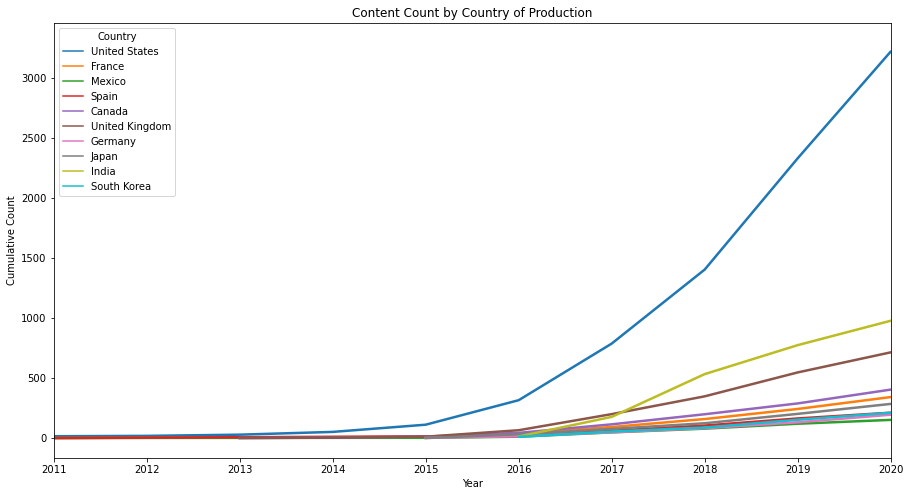

In [10]:
# graphing the cumulative counts for the top 10 countries over time
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='year_added', y='cumulative_count', data=country_10, hue='country', linewidth=2.5)
ax.set(xlim=(2011, 2020))
ax.set_title('Content Count by Country of Production')
ax.set_ylabel('Cumulative Count')
ax.set_xlabel('Year')
ax.legend(title='Country')

In [11]:
# merging expanded countries dataframe to find month-relative cumulative counts
date_df = country_aggregate.merge(titles_df['date_added'], left_on='level_0', right_index=True).set_index('level_0')
date_df.columns = ['second index', 'country', 'date_added']
date_df = date_df.drop(columns='second index', axis=1)
date_df.index.name = None

cumulative_by_month = date_df.groupby(['date_added', 'country']).size().groupby(level=1).cumsum().reset_index(name='counts')
cumulative_by_month['date_added'] = cumulative_by_month['date_added']

# taking a look at the cumulative counts for all countries
cumulative_by_month


,date_added,country,counts
0,2008-01,United States,1
1,2008-02,India,1
2,2009-05,United States,2
3,2009-11,United States,3
4,2010-11,South Korea,1
...,...,...,...
1963,2021-01,Spain,215
1964,2021-01,Taiwan,85
1965,2021-01,Turkey,108
1966,2021-01,United Kingdom,723


In [12]:
# filling out the monthly cumulative counts table for time-lapse choropleth map
country_list = cumulative_by_month.country.unique().tolist()
del country_list[12]
del country_list[13]

date_list = pd.date_range('2015-01-01','2021-01-01', 
              freq='MS').strftime("%Y-%m").tolist()
date_column = date_list * len(country_list)

country_column = []
for i in country_list:
    country_column = country_column + [i]*len(date_list)

    
int_c_by_month = pd.DataFrame({'date_added': date_column, 'country': country_column})
c_by_month = pd.merge(int_c_by_month, cumulative_by_month, how='left', on=['date_added','country'])


for row in range(len(c_by_month)):    
    if pd.isna(c_by_month.iloc[row,2]):
        if c_by_month.iloc[row,1] == c_by_month.iloc[row-1,1]:
            c_by_month.iloc[row,2] = c_by_month.iloc[row-1,2]
        else:
            pass
    else:
        pass

c_by_month

,date_added,country,counts
0,2015-01,United States,27.0
1,2015-02,United States,28.0
2,2015-03,United States,30.0
3,2015-04,United States,33.0
4,2015-05,United States,37.0
...,...,...,...
8390,2020-09,Vatican City,NaN
8391,2020-10,Vatican City,NaN
8392,2020-11,Vatican City,NaN
8393,2020-12,Vatican City,1.0


In [13]:
# creating a time-lapse choropleth map for country cumulative counts
fig = px.choropleth(c_by_month, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='date_added',
                    range_color=[0,500],
                    color_continuous_scale=px.colors.sequential.YlGnBu
                   )

fig.update_layout(title='Netflix US\' Content Expansion by Country of Production')


#### Genre Analysis

In [14]:
# creating a base titles_df dataframe with expanded countries for further use
titles_df_country_expanded = country_aggregate.merge(country_df, left_on='level_0', right_index=True).set_index('level_0')
titles_df_country_expanded = titles_df_country_expanded.drop(columns='level_1', axis=1).dropna(subset=['listed_in', 0])
titles_df_country_expanded = titles_df_country_expanded.rename(columns={0:'unstacked_country'})
titles_df_country_expanded.index.name = None

# unpacking the genres in 'listed_in' for analysis
genre_by_country = titles_df_country_expanded.copy()
genre_by_country['listed_in'] = genre_by_country['listed_in'].apply(lambda x: ",".join(x))

concat_genre = pd.concat([genre_by_country['unstacked_country'], genre_by_country['type'], genre_by_country['listed_in'].astype(str).str.split(',', expand=True)], axis=1) 

def strip_element(x):
    return x.str.strip()

concat_genre[[0,1,2]] = concat_genre[[0,1,2]].apply(strip_element)

melt_genre = pd.melt(concat_genre, id_vars=['unstacked_country','type'])
melt_genre = melt_genre.loc[:, ['unstacked_country', 'type', 'value']]
melt_genre = melt_genre.sort_values(by='unstacked_country').reset_index(drop=True)
melt_genre = melt_genre[melt_genre['unstacked_country'] != 'NULL'].dropna()

# finding the genre counts for the top 15 countries by type
genre_count = melt_genre.groupby(['unstacked_country', 'type'])['value'].value_counts().groupby(level=[0,1]).head(10).reset_index(name='count')
genre_count_15 = genre_count[genre_count['unstacked_country'].isin(top_15)]

# taking a look at the genre counts for the top 15 countries by type
genre_count_15.head(20)


,unstacked_country,type,value,count
31,Australia,Movie,Dramas,33
32,Australia,Movie,International Movies,25
33,Australia,Movie,Children & Family Movies,18
34,Australia,Movie,Comedies,15
35,Australia,Movie,Documentaries,13
36,Australia,Movie,Action & Adventure,12
37,Australia,Movie,Thrillers,8
38,Australia,Movie,Independent Movies,7
39,Australia,Movie,Sci-Fi & Fantasy,7
40,Australia,Movie,Sports Movies,7


([<matplotlib.patches.Wedge at 0x7ffe789199d0>,
 [Text(0.7143928375004462, 0.8364465755372912, 'Dramas'),
  Text(-0.6465638275138399, 0.8899186574910392, 'Children & Family Movies'),
  Text(-1.096609073570804, 0.08630492316306891, 'Comedies'),
  Text(-0.8726886220736941, -0.6696376399987661, 'Documentaries'),
  Text(-0.28470085842263176, -1.0625184333522957, 'Action & Adventure'),
  Text(0.2847010573829368, -1.062518380041041, 'Thrillers'),
  Text(0.6696376706388923, -0.8726885985626938, 'Independent Movies'),
  Text(0.937904246708988, -0.5747483136167046, 'Sci-Fi & Fantasy'),
  Text(1.0815804216243567, -0.20045895230415306, 'Sports Movies')])

Text(0.5, 1.0, 'Australia')

([<matplotlib.patches.Wedge at 0x7ffe78943520>,
 [Text(0.91709167411942, 0.6074066687655313, 'Comedies'),
  Text(-0.12287896049362551, 1.0931151636803902, 'Dramas'),
  Text(-0.9880923078232094, 0.48339796360825116, 'Children & Family Movies'),
  Text(-1.0290586200409597, -0.38863653523491054, 'Thrillers'),
  Text(-0.6107143379795101, -0.9148923419650253, 'Documentaries'),
  Text(-0.011916107753421874, -1.0999354555500105, 'Independent Movies'),
  Text(0.5637020648585861, -0.9445845552803448, 'Action & Adventure'),
  Text(0.9425429413881923, -0.5671091637765121, 'Horror Movies'),
  Text(1.0861447314535233, -0.174039140240791, 'Romantic Movies')])

Text(0.5, 1.0, 'Canada')

([<matplotlib.patches.Wedge at 0x7ffe78962ee0>,
 [Text(0.5377145363758242, 0.9596161093740209, 'Action & Adventure'),
  Text(-0.9936789683125916, 0.47180727838093356, 'Comedies'),
  Text(-0.8590695612066015, -0.6870221896040166, 'Dramas'),
  Text(-0.0741468755405516, -1.0974981735053477, 'Children & Family Movies'),
  Text(0.5003339342969201, -0.9796254152434826, 'Sci-Fi & Fantasy'),
  Text(0.8590697059348162, -0.6870220086322334, 'Romantic Movies'),
  Text(1.0192834297801863, -0.4135955630510806, 'Documentaries'),
  Text(1.083492457657962, -0.18985282246600765, 'Thrillers'),
  Text(1.0991828706991758, -0.04239123448921416, 'Horror Movies')])

Text(0.5, 1.0, 'China')

([<matplotlib.patches.Wedge at 0x7ffe78987910>,
 [Text(0.36250344651486754, 1.038552478820807, 'Comedies'),
  Text(-1.0742826059370336, -0.23646750851044265, 'Dramas'),
  Text(-0.17796016379071317, -1.0855091801102295, 'Action & Adventure'),
  Text(0.42919479770756397, -1.0128138158717837, 'Romantic Movies'),
  Text(0.8147961306513415, -0.7389907072998972, 'Classic Movies'),
  Text(0.9773878619463349, -0.5046909621936702, 'Thrillers'),
  Text(1.0424184969474863, -0.35123165748796564, 'Horror Movies'),
  Text(1.0791534207985498, -0.21313820487840313, 'Independent Movies'),
  Text(1.0976771791380335, -0.07144795588097354, 'Music & Musicals')])

Text(0.5, 1.0, 'Egypt')

([<matplotlib.patches.Wedge at 0x7ffe789aa310>,
 [Text(0.4934015052392817, 0.9831352677163052, 'Dramas'),
  Text(-0.9831352446185128, 0.49340155126316465, 'Independent Movies'),
  Text(-1.0271387652877526, -0.39368255846957606, 'Comedies'),
  Text(-0.545150323464996, -0.9554114950250548, 'Documentaries'),
  Text(0.05868627093484034, -1.098433394250085, 'Thrillers'),
  Text(0.5740330090613627, -0.9383422107674565, 'Action & Adventure'),
  Text(0.8918865781184677, -0.6438465125883114, 'Romantic Movies'),
  Text(1.041398223163606, -0.35424531160155676, 'Children & Family Movies'),
  Text(1.0953981947072784, -0.10051266105339905, 'Sports Movies')])

Text(0.5, 1.0, 'France')

([<matplotlib.patches.Wedge at 0x7ffe789c3d00>,
 [Text(0.6825767065938908, 0.8626059584859344, 'Dramas'),
  Text(-0.7382082755441675, 0.8155050839314901, 'Comedies'),
  Text(-1.0996134548264684, -0.0291590460166042, 'Action & Adventure'),
  Text(-0.8203798612837335, -0.7327870653880856, 'Independent Movies'),
  Text(-0.22442226674499366, -1.0768633368208982, 'Thrillers'),
  Text(0.36478123192756823, -1.0377546207237074, 'Documentaries'),
  Text(0.8006667101789682, -0.7542763546679614, 'Children & Family Movies'),
  Text(1.0197200787911762, -0.4125178310208149, 'Sci-Fi & Fantasy'),
  Text(1.092181284892978, -0.1309199791075601, 'Romantic Movies')])

Text(0.5, 1.0, 'Germany')

([<matplotlib.patches.Wedge at 0x7ffe789e8700>,
 [Text(0.2447730130080499, 1.0724207066739067, 'Action & Adventure'),
  Text(-1.0815121760944815, -0.20082682330649765, 'Comedies'),
  Text(-0.13430374524277974, -1.091770353148391, 'Dramas'),
  Text(0.7203468055708542, -0.8313245333224963, 'Romantic Movies'),
  Text(0.9253788864306646, -0.5947048987088835, 'Cult Movies'),
  Text(1.0097082439449772, -0.4364507556523998, 'Independent Movies'),
  Text(1.0615442881454864, -0.2883118525237781, 'Sci-Fi & Fantasy'),
  Text(1.0888035854028022, -0.15654632673430274, 'Thrillers'),
  Text(1.0990845790181965, -0.044867451057464355, 'Children & Family Movies')])

Text(0.5, 1.0, 'Hong Kong')

([<matplotlib.patches.Wedge at 0x7ffe78a0d100>,
 [Text(0.3449356920571516, 1.0445187257033997, 'Dramas'),
  Text(-1.0997338799762106, 0.024194900960117963, 'Comedies'),
  Text(-0.6975668737716225, -0.8505295154293503, 'Independent Movies'),
  Text(-0.14148851038676638, -1.0908625034478607, 'Action & Adventure'),
  Text(0.39259561960124345, -1.027554708747868, 'Romantic Movies'),
  Text(0.7774285246746874, -0.7782061995526245, 'Music & Musicals'),
  Text(1.0062079233098342, -0.44446103886450045, 'Thrillers'),
  Text(1.083773075788248, -0.1882443098648162, 'Horror Movies'),
  Text(1.0985135216776771, -0.05716679710555648, 'Documentaries')])

Text(0.5, 1.0, 'India')

([<matplotlib.patches.Wedge at 0x7ffe78a24b20>,
 [Text(0.584033580032789, 0.9321506194784639, 'Anime Features'),
  Text(-1.0599050041223061, 0.29428112789727834, 'Action & Adventure'),
  Text(-0.6656916345927321, -0.8757023738881018, 'Dramas'),
  Text(-2.0206672185931328e-16, -1.1, 'Children & Family Movies'),
  Text(0.47982677531453805, -0.9898314329678827, 'Comedies'),
  Text(0.7419281471627143, -0.8121222964847732, 'Sci-Fi & Fantasy'),
  Text(0.932150592137878, -0.5840336236699081, 'Documentaries'),
  Text(1.0424184887263155, -0.35123168188753207, 'Independent Movies'),
  Text(1.0935517529177918, -0.11893091982501831, 'Music & Musicals')])

Text(0.5, 1.0, 'Japan')

([<matplotlib.patches.Wedge at 0x7ffe78a49520>,
 [Text(0.7101906450815026, 0.8400174091283582, 'Dramas'),
  Text(-0.6912996360602282, 0.8556312366802631, 'Comedies'),
  Text(-1.09754356707091, -0.07347188837414907, 'Independent Movies'),
  Text(-0.6720654964774613, -0.8708202848145554, 'Documentaries'),
  Text(0.13446169761912177, -1.0917509110934527, 'Stand-Up Comedy'),
  Text(0.6720654862859508, -0.8708202926799701, 'Action & Adventure'),
  Text(0.9068857100202198, -0.6225418130223238, 'Romantic Movies'),
  Text(1.0469169319874108, -0.3375869332750707, 'Horror Movies'),
  Text(1.0956342696398076, -0.09790580774829175, 'Children & Family Movies')])

Text(0.5, 1.0, 'Mexico')

([<matplotlib.patches.Wedge at 0x7ffe78a62ee0>,
 [Text(0.7641241712858573, 0.7912738153488349, 'Dramas'),
  Text(-0.6151122896355184, 0.9119412651806861, 'Action & Adventure'),
  Text(-1.0892948553897561, -0.15309055497126664, 'Comedies'),
  Text(-0.4474101411656077, -1.004900077411765, 'Thrillers'),
  Text(0.3762223539033377, -1.0336618114371026, 'Children & Family Movies'),
  Text(0.8174594521689414, -0.7360435069067959, 'Sci-Fi & Fantasy'),
  Text(1.0049000931203496, -0.4474101058835316, 'Horror Movies'),
  Text(1.0759624078258996, -0.22870263869376992, 'Documentaries'),
  Text(1.0973204713204727, -0.07673189181178755, 'Independent Movies')])

Text(0.5, 1.0, 'South Korea')

([<matplotlib.patches.Wedge at 0x7ffe78a878e0>,
 [Text(0.6009836233753406, 0.9213135646644128, 'Dramas'),
  Text(-0.9253789316708985, 0.5947048283136995, 'Comedies'),
  Text(-0.9563458409401773, -0.5435095514491218, 'Thrillers'),
  Text(-0.302721611380565, -1.0575252365797965, 'Documentaries'),
  Text(0.2738487693353127, -1.0653670032122897, 'Independent Movies'),
  Text(0.6740796254508058, -0.8692621345440635, 'Horror Movies'),
  Text(0.8916741134898973, -0.6441407263416946, 'Romantic Movies'),
  Text(1.0266702137158958, -0.39490286434585026, 'Children & Family Movies'),
  Text(1.0917703657228104, -0.13430364302386166, 'Sci-Fi & Fantasy')])

Text(0.5, 1.0, 'Spain')

([<matplotlib.patches.Wedge at 0x7ffe78aab2e0>,
 [Text(0.14919729754540328, 1.0898349262182547, 'Comedies'),
  Text(-1.014961017071771, -0.42409212893501824, 'Dramas'),
  Text(0.06798322743048413, -1.0978972086621477, 'Romantic Movies'),
  Text(0.7533984221587569, -0.8014928680211046, 'Action & Adventure'),
  Text(0.9117722156613861, -0.6153628415397918, 'Horror Movies'),
  Text(1.0041607896949076, -0.44906693091264194, 'Independent Movies'),
  Text(1.0595275856619173, -0.2956371005496918, 'Thrillers'),
  Text(1.0879062712194316, -0.16266513160918156, 'Children & Family Movies'),
  Text(1.0986540565724106, -0.05439911742838069, 'Sports Movies')])

Text(0.5, 1.0, 'Turkey')

([<matplotlib.patches.Wedge at 0x7ffe78ac4cd0>,
 [Text(0.8018655028537539, 0.7530018030078657, 'Dramas'),
  Text(-0.5392219325798038, 0.9587698928444206, 'Documentaries'),
  Text(-1.0971104612749383, 0.07967832679651428, 'Comedies'),
  Text(-0.8407473056273895, -0.7093264185692544, 'Action & Adventure'),
  Text(-0.2269691367440504, -1.0763294156370813, 'Independent Movies'),
  Text(0.36509859322873095, -1.0376430104917596, 'Thrillers'),
  Text(0.7721579821734627, -0.7834360539098304, 'Children & Family Movies'),
  Text(0.9907359537449, -0.47795634733433934, 'Music & Musicals'),
  Text(1.0876761363797238, -0.16419690115856767, 'Romantic Movies')])

Text(0.5, 1.0, 'United Kingdom')

([<matplotlib.patches.Wedge at 0x7ffe78ae86d0>,
 [Text(0.8956989296189111, 0.6385322446670466, 'Dramas'),
  Text(-0.1930949316915752, 1.0829193632745822, 'Comedies'),
  Text(-0.9795883233052768, 0.500406551559786, 'Documentaries'),
  Text(-1.0655738405177977, -0.27304283620734554, 'Independent Movies'),
  Text(-0.7164165025418306, -0.8347139599202421, 'Children & Family Movies'),
  Text(-0.14892253076343745, -1.089872506227684, 'Action & Adventure'),
  Text(0.3810858760151811, -1.0318786532832929, 'Thrillers'),
  Text(0.7532237834579955, -0.8016569915077288, 'Stand-Up Comedy'),
  Text(0.9817433521634483, -0.49616528544717403, 'Romantic Movies'),
  Text(1.0874218385038759, -0.16587267751155063, 'Horror Movies')])

Text(0.5, 1.0, 'United States')

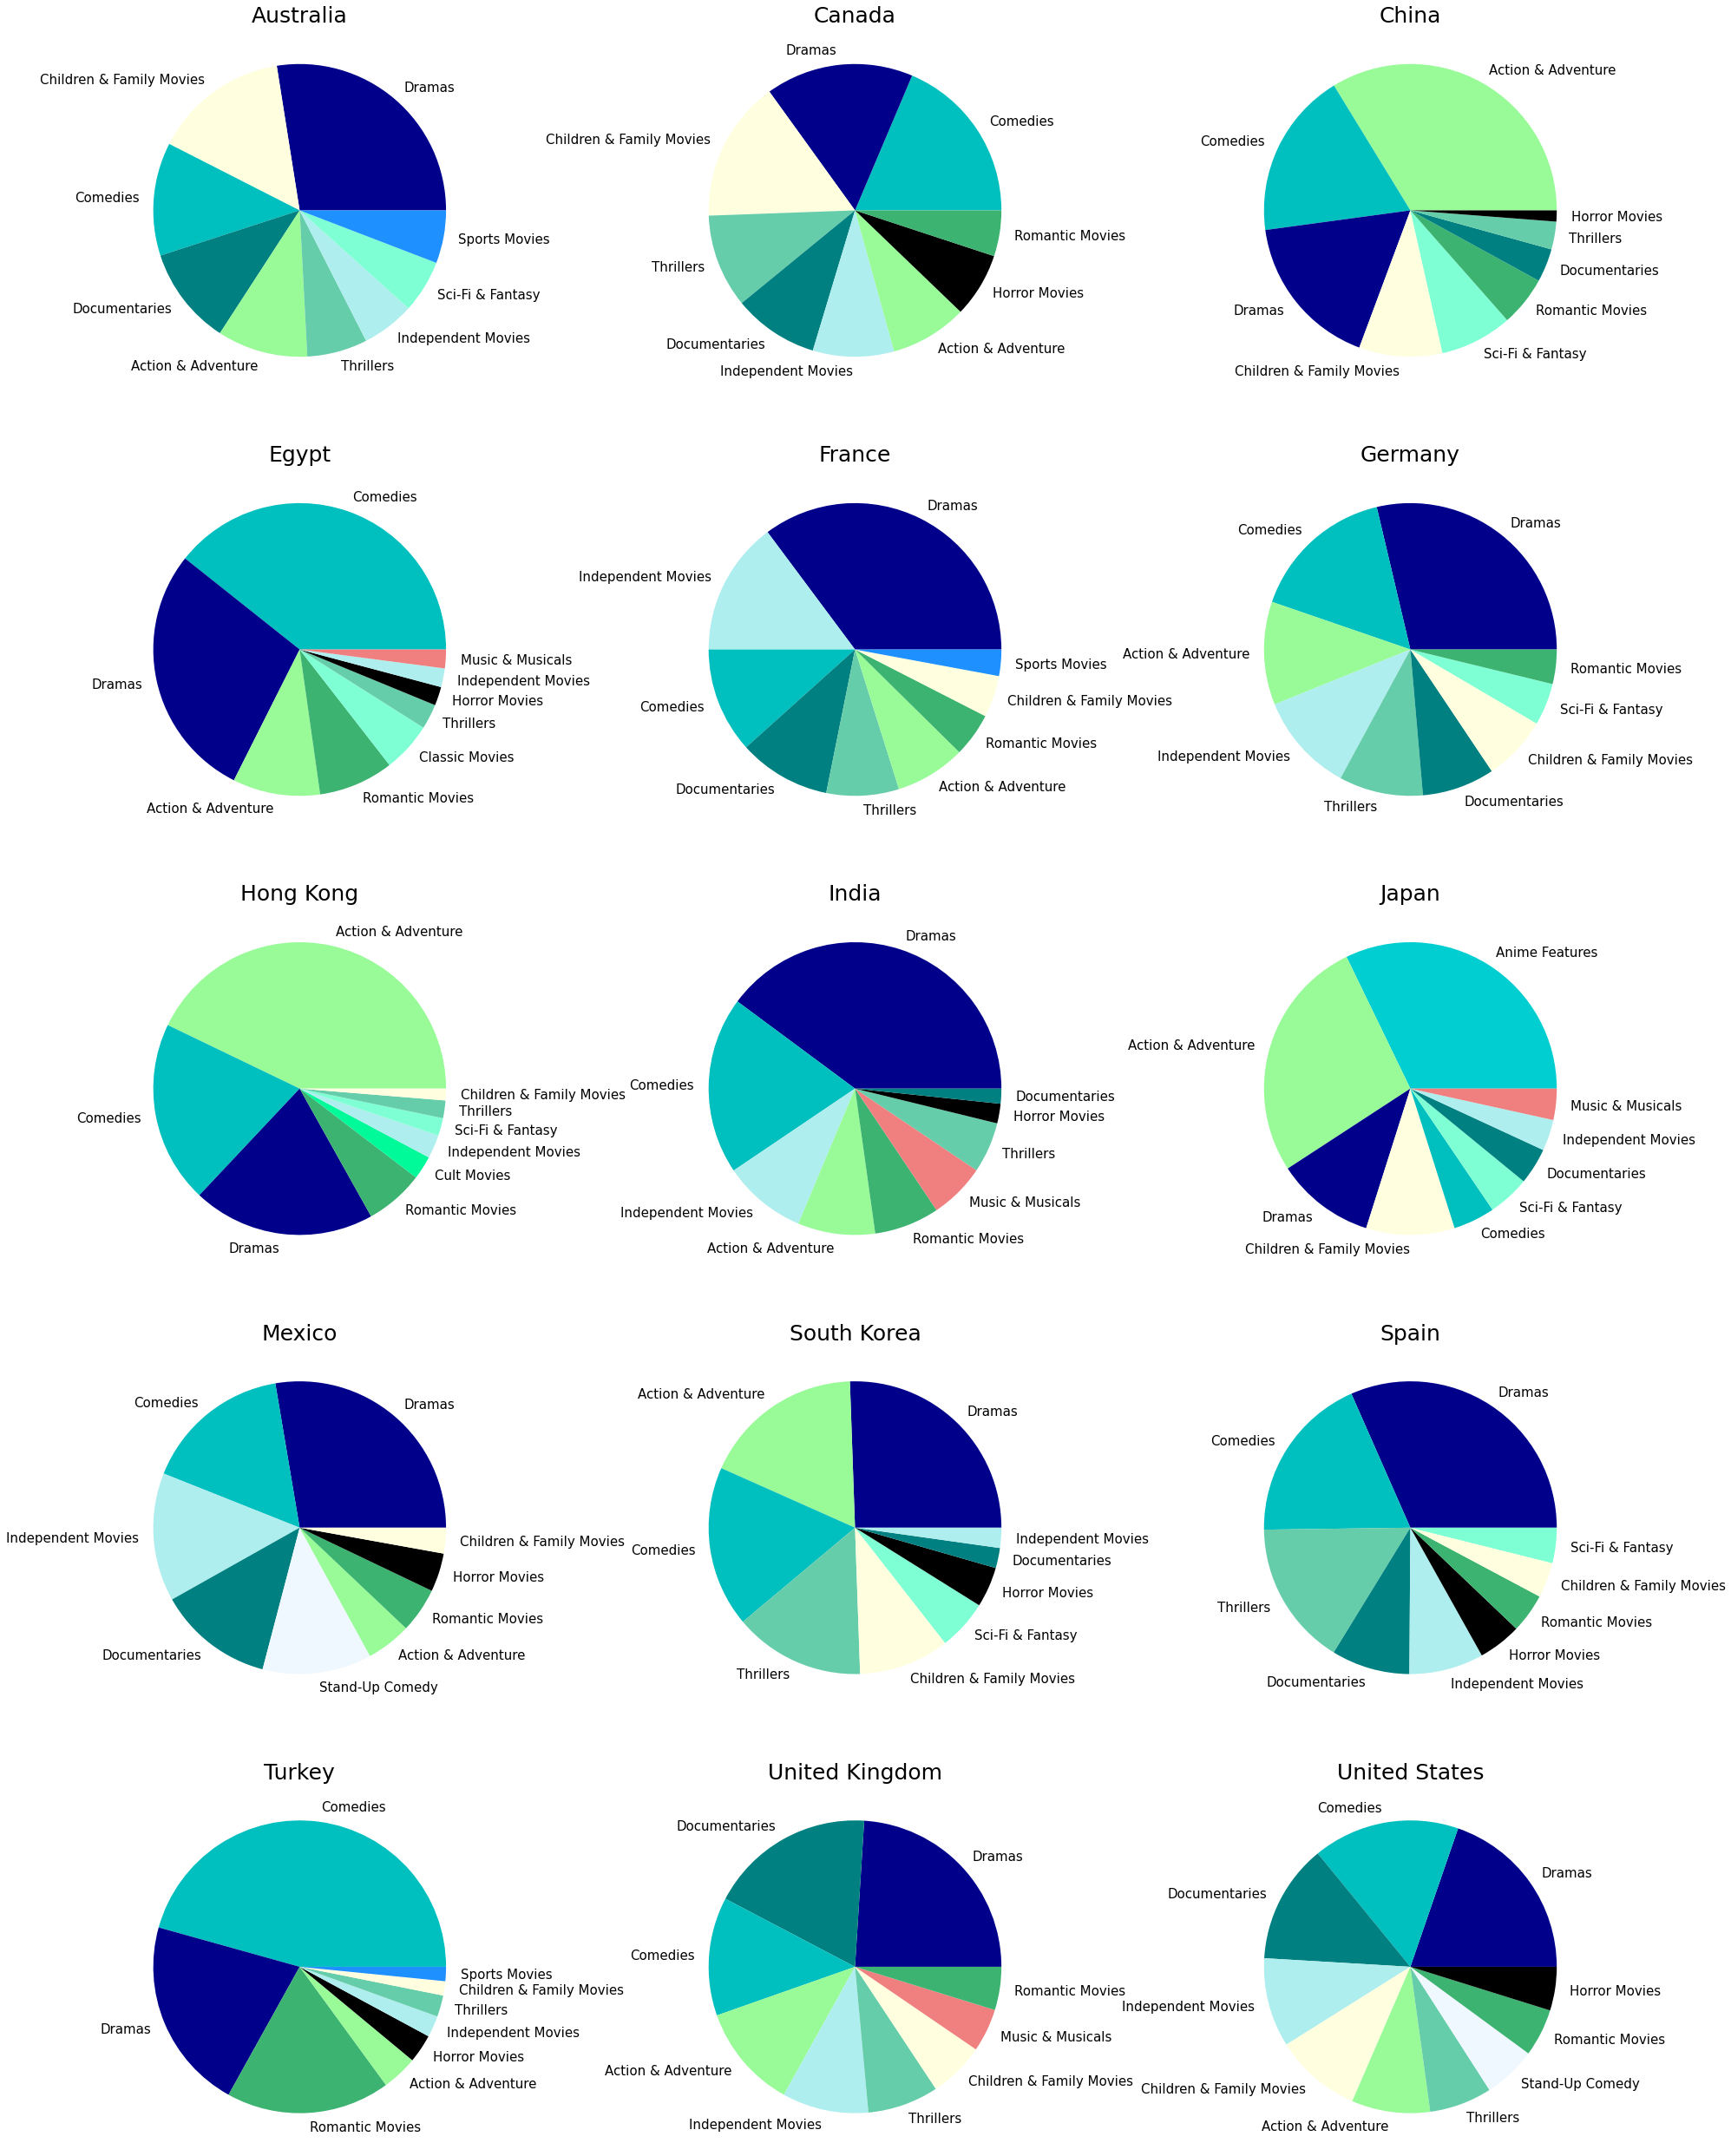

In [15]:
# creating pie charts to see the movie genre breakdown for the top 15 countries

colors_dict_movies = {'Dramas': 'darkblue', 'Comedies':'c', 'Action & Adventure':'palegreen', 'Children & Family Movies':'lightyellow', 
               'Independent Movies':'paleturquoise', 'Romantic Movies':'mediumseagreen', 'Thrillers':'mediumaquamarine', 
               'Documentaries':'teal', 'Sci-Fi & Fantasy':'aquamarine', 'Stand-Up Comedy':'aliceblue', 
               'Horror Movies':'k', 'Music & Musicals':'lightcoral', 'Sports Movies':'dodgerblue', 'Movies':'mistyrose', 'International Movies':'tan',
               'Classic Movies':'aquamarine', 'Cult Movies':'mediumspringgreen', 'Anime Features':'darkturquoise'}

genre_count_15_movies = genre_count_15.loc[(genre_count_15['type'] == 'Movie') & (genre_count['value'] != 'International Movies')]

fig, axs = plt.subplots(5, 3, figsize=(5*6.5, 3*15), subplot_kw={'aspect':'equal'})

for ax, (name, sub_df) in zip(axs.ravel(), genre_count_15_movies.groupby('unstacked_country')):
    ax.pie(sub_df['count'], labels=sub_df['value'], colors = [colors_dict_movies[x] for x in sub_df['value']], textprops={'fontsize': 15})
    ax.set_title(name, size = 25)


([<matplotlib.patches.Wedge at 0x7ffe5da1fdc0>,
 [Text(0.8717245209692659, 0.6708922115667346, 'TV Dramas'),
  Text(-0.3543325143711856, 1.0413685559202341, "Kids' TV"),
  Text(-1.0836528987071299, 0.18893489652162032, 'TV Comedies'),
  Text(-0.8480484391152092, -0.7005810766173017, 'Reality TV'),
  Text(-0.17020218189436925, -1.0867526016892695, 'Docuseries'),
  Text(0.49430752877208106, -0.9826800430451605, 'Crime TV Shows'),
  Text(0.8943617781156046, -0.6404037865643005, 'Science & Nature TV'),
  Text(1.0473294741530454, -0.33630488038431083, 'British TV Shows'),
  Text(1.0941056925069792, -0.11372217736142705, 'Romantic TV Shows')])

Text(0.5, 1.0, 'Australia')

([<matplotlib.patches.Wedge at 0x7ffe5da44910>,
 [Text(0.5711990874413513, 0.9400699987267798, "Kids' TV"),
  Text(-0.9352388142210182, 0.5790754358237483, 'TV Dramas'),
  Text(-0.9805263416061837, -0.49856603716698716, 'TV Comedies'),
  Text(-0.38873593987354904, -1.0290210731810252, 'Crime TV Shows'),
  Text(0.10149513810222392, -1.09530759923485, 'TV Action & Adventure'),
  Text(0.506784743255416, -0.9763038584393398, 'Docuseries'),
  Text(0.8003457649028983, -0.7546168939282996, 'Reality TV'),
  Text(0.9887634089884374, -0.4820237764317902, 'TV Mysteries'),
  Text(1.087450188369154, -0.16568671587031716, 'TV Sci-Fi & Fantasy')])

Text(0.5, 1.0, 'Canada')

([<matplotlib.patches.Wedge at 0x7ffe5da6e1c0>,
 [Text(0.7382082373676185, 0.8155051184895126, 'Romantic TV Shows'),
  Text(-0.8580631018136236, 0.6882788049228185, 'TV Dramas'),
  Text(-0.910034388561504, -0.6179299407177886, 'TV Comedies'),
  Text(-0.23867663355860494, -1.0737939581656863, 'TV Action & Adventure'),
  Text(0.3232353419587233, -1.0514365951919438, "Kids' TV"),
  Text(0.7052030272397213, -0.8442089139377369, 'Crime TV Shows'),
  Text(0.9338817207752561, -0.5812615001888967, 'Teen TV Shows'),
  Text(1.0576554059100967, -0.30226650881159295, 'TV Sci-Fi & Fantasy'),
  Text(1.0965227258098276, -0.08739514736291469, 'British TV Shows')])

Text(0.5, 1.0, 'China')

([<matplotlib.patches.Wedge at 0x7ffe5da87cd0>,
 [Text(6.735557395310444e-17, 1.1, 'TV Dramas'),
  Text(-1.0005951890558762, -0.45695652707695916, 'Romantic TV Shows'),
  Text(-0.3099057721001756, -1.055442282845914, 'TV Comedies'),
  Text(0.4569565739181999, -1.0005951676641962, 'TV Mysteries'),
  Text(0.8313245839052956, -0.7203467471951875, 'Crime TV Shows'),
  Text(1.0005952318392295, -0.45695643339447445, 'TV Horror'),
  Text(1.0888036000597223, -0.1565462247931533, 'TV Sci-Fi & Fantasy')])

Text(0.5, 1.0, 'Egypt')

([<matplotlib.patches.Wedge at 0x7ffe5daa0d90>,
 [Text(0.5811153323370742, 0.9339726818931976, "Kids' TV"),
  Text(-0.968101905653504, 0.5222822036696774, 'TV Dramas'),
  Text(-0.8636380339683453, -0.6812703914623706, 'TV Comedies'),
  Text(0.14919724652654748, -1.089834933202683, 'Crime TV Shows'),
  Text(0.7921133797397193, -0.7632538199297264, 'Docuseries'),
  Text(0.9681019178784009, -0.5222821810096165, 'TV Action & Adventure'),
  Text(1.0436108105822812, -0.3476729440663941, 'TV Horror'),
  Text(1.0835500053351137, -0.18952410384506516, 'TV Thrillers'),
  Text(1.0986540565724106, -0.05439911742838069, 'Reality TV')])

Text(0.5, 1.0, 'France')

([<matplotlib.patches.Wedge at 0x7ffe5dac3670>,
 [Text(0.6507294633989119, 0.8868771986383258, 'TV Dramas'),
  Text(-0.9568969637815204, 0.54253866286718, 'Crime TV Shows'),
  Text(-0.9304153209446357, -0.5867941125739851, 'Docuseries'),
  Text(-0.378913619011373, -1.032678299049469, "Kids' TV"),
  Text(0.23038420036199211, -1.0756036073868318, 'British TV Shows'),
  Text(0.6915840683801219, -0.8554013539636228, 'TV Comedies'),
  Text(0.9568969510824864, -0.5425386852649696, 'Reality TV'),
  Text(1.069907168093579, -0.2555360085427847, 'Science & Nature TV'),
  Text(1.0987909749580895, -0.051559609682881785, 'Romantic TV Shows')])

Text(0.5, 1.0, 'Germany')

([<matplotlib.patches.Wedge at 0x7ffe5daef0a0>,
 [Text(0.33991867422268784, 1.0461621742897658, 'TV Dramas'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'Crime TV Shows'),
  Text(-0.33991862524830174, -1.0461621902025062, 'Romantic TV Shows'),
  Text(0.6465638483438898, -0.88991864235712, 'Korean TV Shows'),
  Text(1.0461621981588756, -0.33991860076110864, 'TV Comedies')])

Text(0.5, 1.0, 'Hong Kong')

([<matplotlib.patches.Wedge at 0x7ffe5daf67f0>,
 [Text(0.8009550655537783, 0.753970147262969, 'TV Comedies'),
  Text(-0.7042340697359588, 0.8450173814917235, 'TV Dramas'),
  Text(-1.0680360214457358, -0.26324714033463725, "Kids' TV"),
  Text(-0.6783908269313562, -0.8659017761474976, 'Romantic TV Shows'),
  Text(-0.09954883442040093, -1.095486206926194, 'Crime TV Shows'),
  Text(0.4209517280266836, -1.0162675054685892, 'Docuseries'),
  Text(0.8009550302578872, -0.7539701847583811, 'TV Horror'),
  Text(1.0162674808358716, -0.42095178749532747, 'TV Action & Adventure'),
  Text(1.0919797609110322, -0.1325903531961697, 'Reality TV')])

Text(0.5, 1.0, 'India')

([<matplotlib.patches.Wedge at 0x7ffe5db19130>,
 [Text(-0.08939294911290721, 1.0963616650763093, 'Anime Series'),
  Text(-0.9649965977144815, -0.5279976954490192, "Kids' TV"),
  Text(-0.4975484485039826, -0.9810430884478418, 'TV Dramas'),
  Text(0.04817252047864358, -1.0989446793495725, 'Romantic TV Shows'),
  Text(0.5097884650132557, -0.9747387962625828, 'Crime TV Shows'),
  Text(0.8226592677837629, -0.7302271763838178, 'Teen TV Shows'),
  Text(0.9961290048102581, -0.4666122649220921, 'Reality TV'),
  Text(1.0722014867879772, -0.24573150333168808, 'TV Comedies'),
  Text(1.097846669544922, -0.06879455043186725, 'TV Action & Adventure')])

Text(0.5, 1.0, 'Japan')

([<matplotlib.patches.Wedge at 0x7ffe5db32df0>,
 [Text(0.37106296488382023, 1.0355251209370195, 'Spanish-Language TV Shows'),
  Text(-1.0823225311706697, -0.19641267403178117, 'Crime TV Shows'),
  Text(-0.18019956491540517, -1.0851396761727492, 'TV Dramas'),
  Text(0.4018752597658114, -1.0239610713245704, 'TV Action & Adventure'),
  Text(0.7112596734772523, -0.8391124339950117, 'Romantic TV Shows'),
  Text(0.9088627391169387, -0.619651935722673, "Kids' TV"),
  Text(1.0178347914537311, -0.41714786024423045, 'Docuseries'),
  Text(1.0759623944429686, -0.22870270165556372, 'TV Comedies'),
  Text(1.098031152602876, -0.06578440479019113, 'Classic & Cult TV')])

Text(0.5, 1.0, 'Mexico')

([<matplotlib.patches.Wedge at 0x7ffe5db587f0>,
 [Text(0.23204848135479772, 1.075245786925451, 'Korean TV Shows'),
  Text(-1.0362376583414405, -0.3690684427515418, 'Romantic TV Shows'),
  Text(-0.17601930559655596, -1.085825586389134, 'TV Dramas'),
  Text(0.4064212628699687, -1.0221652298367325, 'Crime TV Shows'),
  Text(0.7757987563294805, -0.7798309365994861, "Kids' TV"),
  Text(0.9875040146199104, -0.48459861855927727, 'TV Comedies'),
  Text(1.074028386381891, -0.23761949677143868, 'TV Action & Adventure'),
  Text(1.0940927241406826, -0.11384687515439604, 'Reality TV'),
  Text(1.0994679139411707, -0.03420973858202728, 'Stand-Up Comedy & Talk Shows')])

Text(0.5, 1.0, 'South Korea')

([<matplotlib.patches.Wedge at 0x7ffe5db7d0d0>,
 [Text(0.47523080405389745, 0.9920462100518738, 'Spanish-Language TV Shows'),
  Text(-1.0926978881667293, 0.12653586525554694, 'Crime TV Shows'),
  Text(-0.6127738347985734, -0.9135142184915628, 'TV Dramas'),
  Text(-0.015851533320524084, -1.09988577992962, 'Romantic TV Shows'),
  Text(0.47523078083337966, -0.9920462211754534, 'Docuseries'),
  Text(0.7834017674008091, -0.7721927679234561, 'TV Comedies'),
  Text(0.9552589481571313, -0.5454175849436205, 'British TV Shows'),
  Text(1.054626633617128, -0.3126702155073368, "Kids' TV"),
  Text(1.095890569781001, -0.09499399488953393, 'TV Action & Adventure')])

Text(0.5, 1.0, 'Spain')

([<matplotlib.patches.Wedge at 0x7ffe5db96af0>,
 [Text(0.2265765091381265, 1.0764121355255991, 'TV Dramas'),
  Text(-1.0826536443356711, -0.19457925482098604, 'Crime TV Shows'),
  Text(-0.4730717523275091, -0.9930775987553944, 'Romantic TV Shows'),
  Text(0.2265764587476377, -1.0764121461324097, 'TV Action & Adventure'),
  Text(0.6930966166228412, -0.8541762581727326, 'TV Comedies'),
  Text(0.9123462485674185, -0.6145114504425107, 'TV Mysteries'),
  Text(1.03116162521766, -0.38302180444261147, 'TV Thrillers'),
  Text(1.0826536352267575, -0.19457930550366107, 'TV Horror'),
  Text(1.0980681048831955, -0.06516469165297767, 'Teen TV Shows')])

Text(0.5, 1.0, 'Turkey')

([<matplotlib.patches.Wedge at 0x7ffe5dbba4f0>,
 [Text(0.33743256124451837, 1.0469666979479169, 'British TV Shows'),
  Text(-1.0943988165843328, 0.11086582096756553, 'Docuseries'),
  Text(-0.8449771102160208, -0.7042823888263733, 'Crime TV Shows'),
  Text(-0.368367561785127, -1.0364870184543948, 'TV Comedies'),
  Text(0.14006985316292137, -1.0910455701916937, "Kids' TV"),
  Text(0.5631473927110318, -0.9449153475749916, 'Reality TV'),
  Text(0.885288403286254, -0.6528893037926682, 'TV Dramas'),
  Text(1.0574278667877892, -0.3030615556955807, 'Science & Nature TV'),
  Text(1.0980607952823775, -0.06528774665917536, 'Romantic TV Shows')])

Text(0.5, 1.0, 'United Kingdom')

([<matplotlib.patches.Wedge at 0x7ffe5dbd2fa0>,
 [Text(0.9150883480114277, 0.6104206052663331, 'TV Comedies'),
  Text(-0.16657055032914106, 1.0873151575155418, 'TV Dramas'),
  Text(-1.0161373765035306, 0.4212657499400138, "Kids' TV"),
  Text(-0.948293839899365, -0.557439497352778, 'Docuseries'),
  Text(-0.2757177774441316, -1.0648848328346443, 'Crime TV Shows'),
  Text(0.38967423998368333, -1.0286661201250573, 'Reality TV'),
  Text(0.8257152675868502, -0.7267697688222704, 'TV Action & Adventure'),
  Text(1.023273766479967, -0.40362209904055363, 'TV Sci-Fi & Fantasy'),
  Text(1.091941905002077, -0.13290175356418313, 'TV Mysteries')])

Text(0.5, 1.0, 'United States')

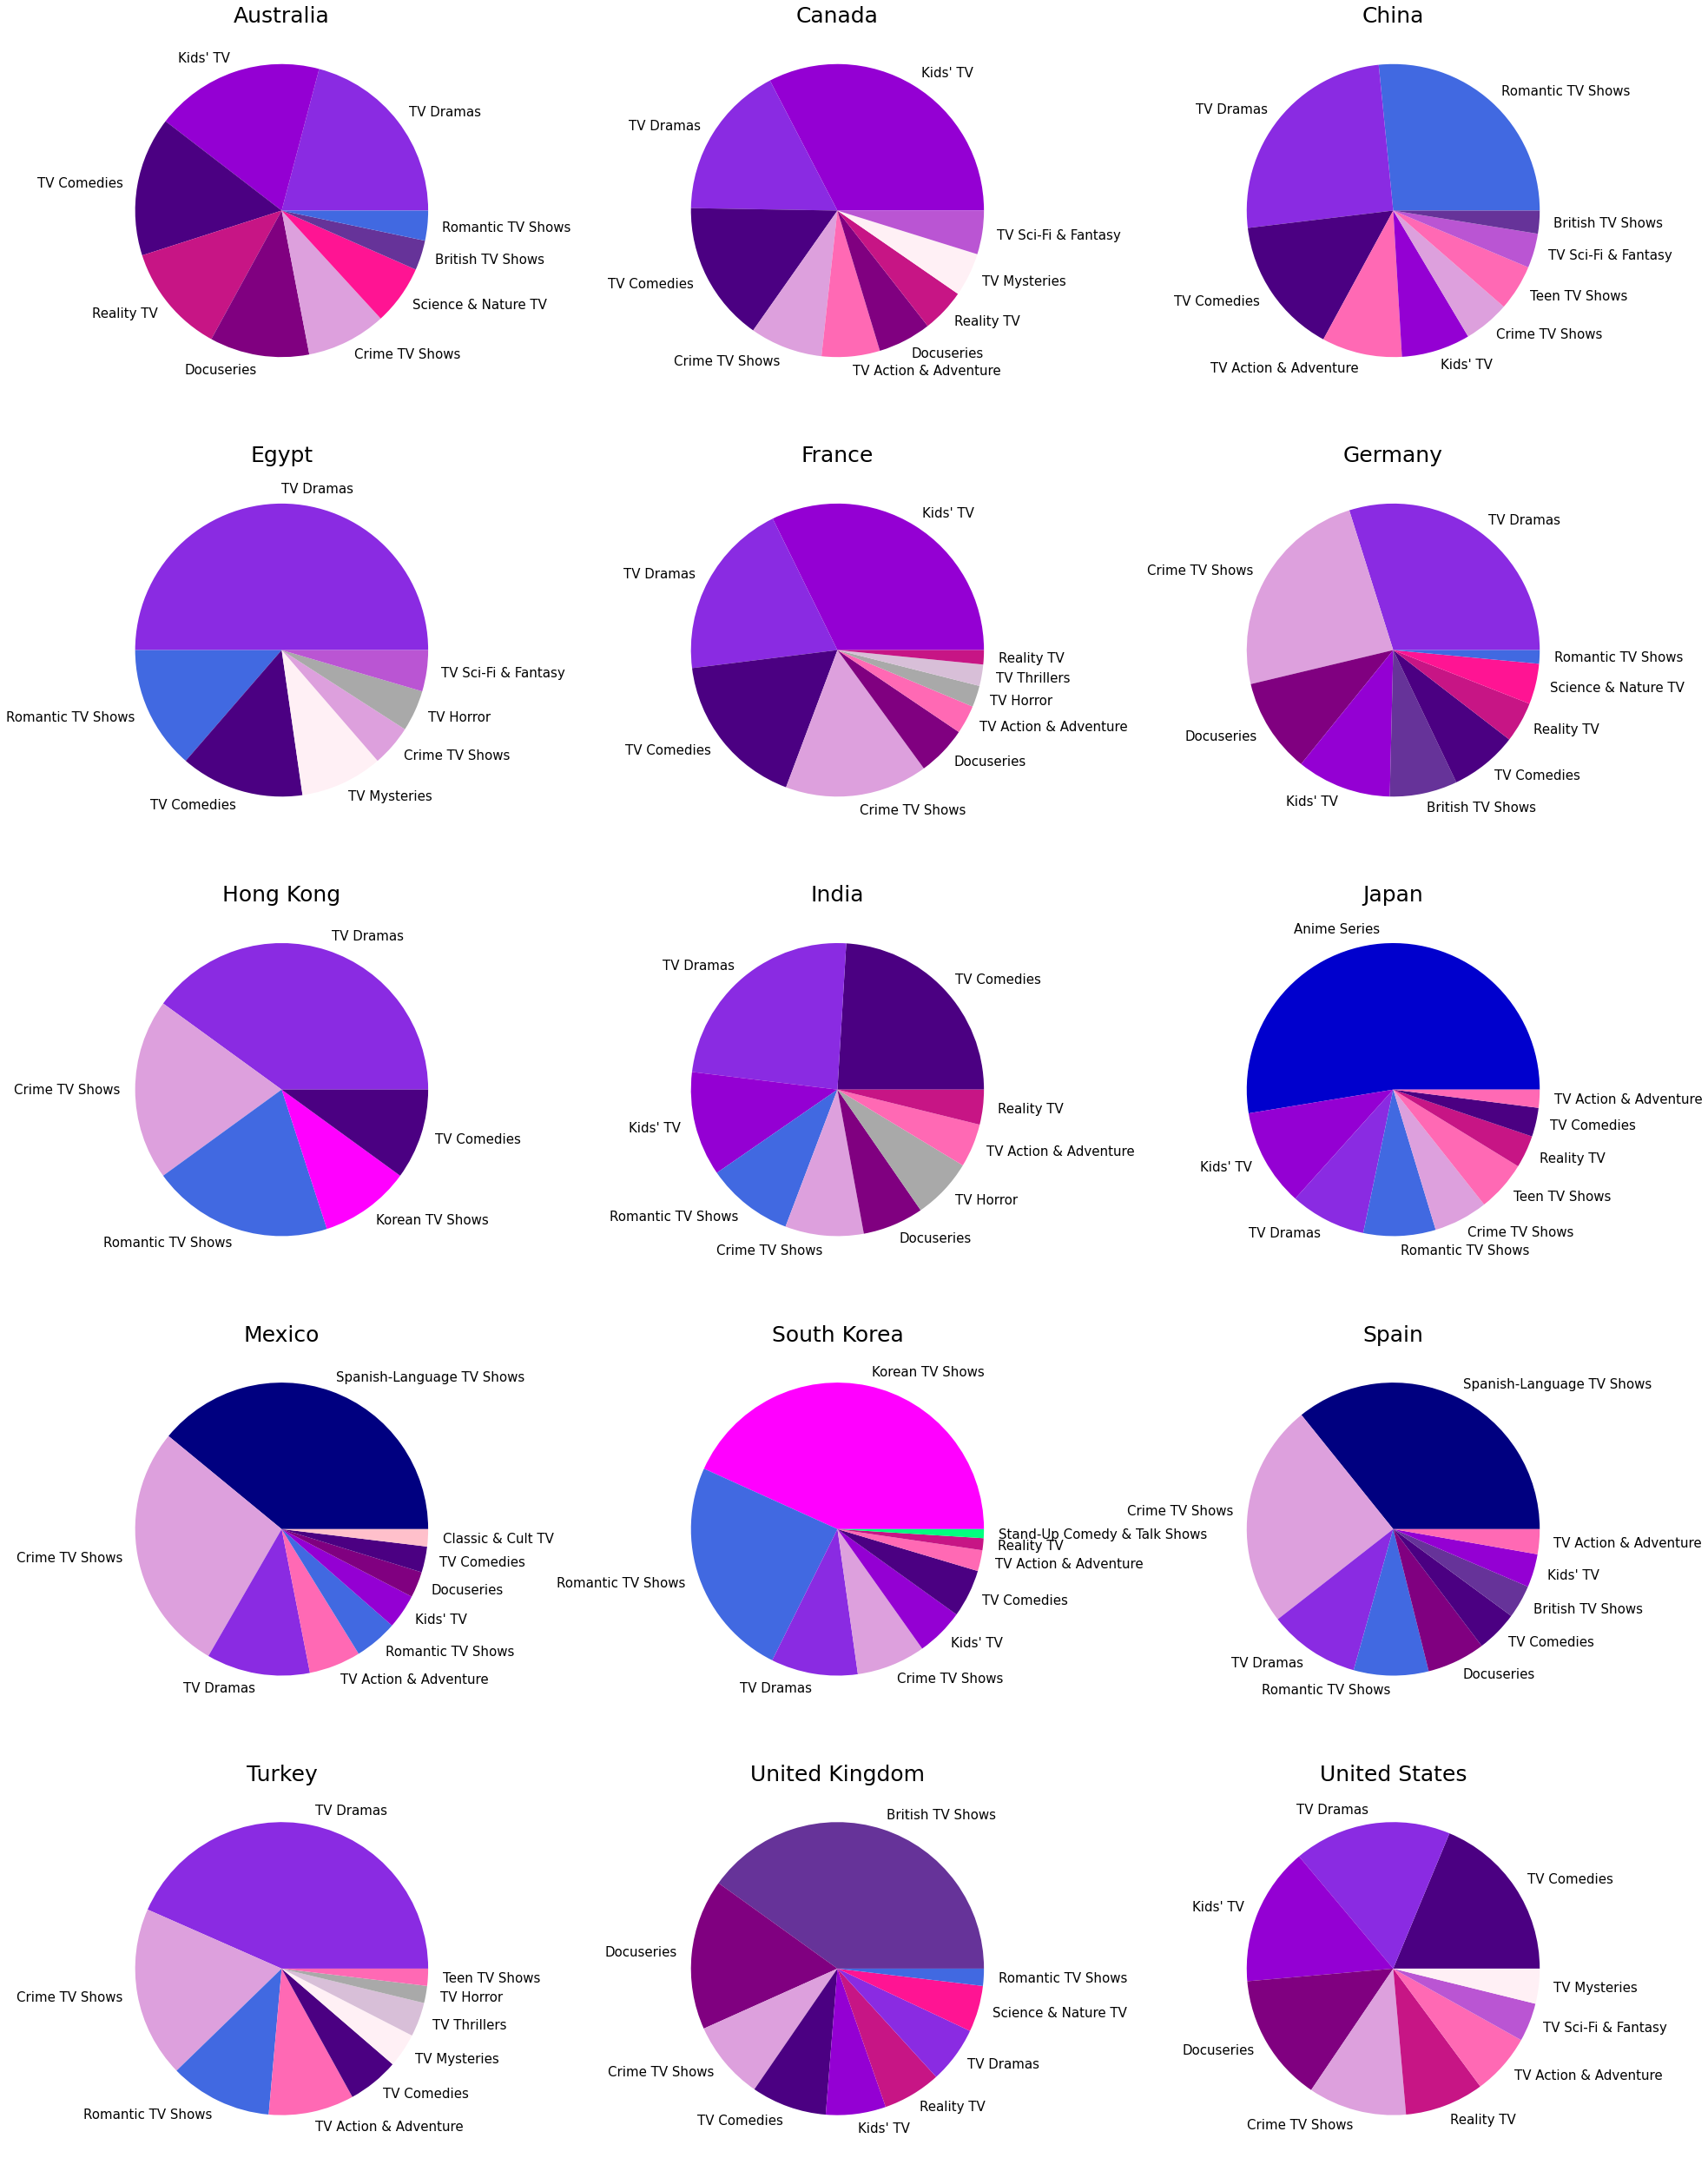

In [16]:
# creating pie charts to see the tv genre breakdown for the top 15 countries

colors_dict_tv = {'TV Dramas': 'blueviolet', 'TV Comedies':'indigo', 'Kids\' TV':'darkviolet', 'Crime TV Shows':'plum', 
               'Docuseries':'purple', 'Romantic TV Shows':'royalblue', 'Reality TV':'mediumvioletred', 
               'British TV Shows':'rebeccapurple', 'Anime Series':'mediumblue', 'TV Action & Adventure':'hotpink', 'TV Mysteries': 'lavenderblush',
               'Korean TV Shows': 'magenta', 'TV Horror':'darkgray', 'Stand-Up Comedy & Talk Shows': 'springgreen',
               'Spanish-Language TV Shows':'navy', 'TV Sci-Fi & Fantasy':'mediumorchid', 'TV Thrillers': 'thistle',
               'Teen TV Shows':'hotpink', 'Science & Nature TV':'deeppink', 'Classic & Cult TV':'pink'}

genre_count_15_tv = genre_count_15[(genre_count_15['type'] == 'TV Show') & (genre_count_15['value'] != 'International TV Shows')]

fig, axs = plt.subplots(5, 3, figsize=(5*6.5, 3*15), subplot_kw={'aspect':'equal'})

for ax, (name, sub_df) in zip(axs.ravel(), genre_count_15_tv.groupby('unstacked_country')):
    ax.pie(sub_df['count'], labels=sub_df['value'], colors = [colors_dict_tv[x] for x in sub_df['value']], textprops={'fontsize': 15})
    ax.set_title(name, size = 25)
    


#### Content Age and Ratings Metrics

In [17]:
# caculating the average content age for the top 25 countries
content_age = titles_df_country_expanded.groupby(['unstacked_country'])['content_age'].mean().round(1).reset_index(name = 'avg_content_age')
content_age_15 = content_age[content_age['unstacked_country'].isin(top_15)].sort_values(by='avg_content_age')

# checking the average content age for the top 25 countries, from newest to oldest
content_age_15

,unstacked_country,avg_content_age
97,Spain,1.5
95,South Korea,1.8
21,China,2.6
64,Mexico,2.8
18,Canada,3.4
105,Turkey,3.8
6,Australia,4.3
33,France,4.5
35,Germany,4.6
50,Japan,4.7


In [18]:
# caculating the age groups counts based on ratings for the top 25 countries
rating_counts = titles_df_country_expanded.groupby(['unstacked_country'])['age_group'].value_counts().reset_index(name = 'counts')
rating_counts_25 = rating_counts[rating_counts['unstacked_country'].isin(top_25)]

# checking the average content age for the top 25 countries
rating_counts_25


,unstacked_country,age_group,counts
4,Argentina,adults,61
5,Argentina,teens,14
6,Argentina,young kids,3
7,Argentina,older kids,2
9,Australia,adults,58
...,...,...,...
244,United Kingdom,young kids,30
245,United States,adults,1574
246,United States,teens,1093
247,United States,older kids,430


In [19]:
# creating a table to chart relative age group distributions by country
ratings_total = rating_counts_25.groupby('unstacked_country')['counts'].sum().reset_index(name="total_count_country")
rating_counts_25 = rating_counts_25.merge(ratings_total, on="unstacked_country")

rating_counts_25['percentage'] = rating_counts_25['counts']/rating_counts_25['total_count_country'] * 100
rating_counts_25 = rating_counts_25.drop(columns='total_count_country')
total_by_region = pd.pivot_table(rating_counts_25, index='unstacked_country', columns = 'age_group', values = 'percentage')

# taking a look at the new table
total_by_region


age_group,adults,older kids,teens,young kids
unstacked_country,,,,
Argentina,76.250000,2.500000,17.500000,3.750000
Australia,41.726619,15.827338,34.532374,7.913669
Belgium,75.609756,9.756098,12.195122,2.439024
Brazil,63.953488,9.302326,23.255814,3.488372
Canada,41.625616,18.719212,28.078818,11.576355
China,33.793103,11.724138,51.034483,3.448276
Egypt,29.090909,NaN,70.909091,NaN
France,58.892128,13.119534,22.157434,5.830904
Germany,54.314721,11.167513,32.487310,2.030457


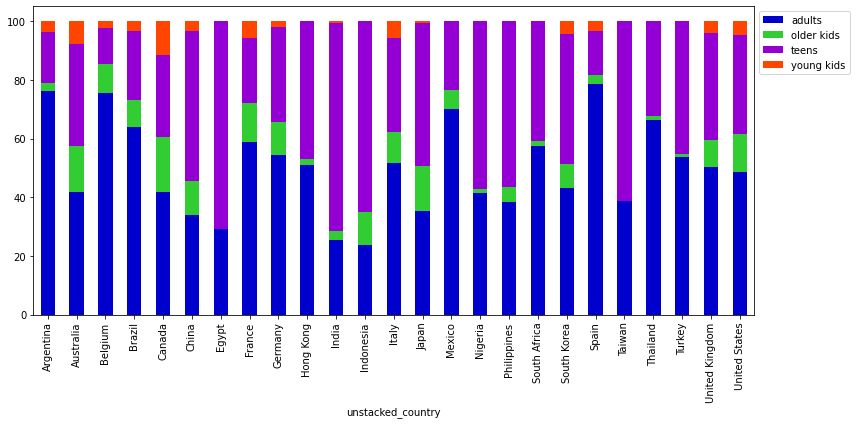

In [20]:
# plotting the ratings distribution by country
total_by_region.plot.bar(stacked=True, figsize=(12,6), color=['mediumblue', 'limegreen', 'darkviolet', 'orangered'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()


### Metrics for Netflix Originals subset in the US Content Library

In [21]:
# loading in tables of current Netflix original programs
dfs_originals = pd.read_html("https://en.wikipedia.org/wiki/List_of_Netflix_original_programming")

# taking a look at the tables
dfs_originals

[                        Title                               Genre  \
 0             Stranger Things              Science fiction/horror   
 1                   The Crown                    Historical drama   
 2                       Ozark                         Crime drama   
 3               Lost in Space                     Science fiction   
 4              Narcos: Mexico                         Crime drama   
 5        The Umbrella Academy                    Superhero action   
 6                Black Summer                        Zombie drama   
 7                Another Life               Science fiction drama   
 8                Criminal: UK  Police procedural anthology series   
 9                Raising Dion     Superhero/Science fiction drama   
 10               Virgin River                      Romantic drama   
 11                The Witcher                       Fantasy drama   
 12                Locke & Key                   Horror teen drama   
 13                O

In [22]:
# loading in tables of ended Netflix original programs
dfs_originals_ended = pd.read_html("https://en.wikipedia.org/wiki/List_of_ended_Netflix_original_programming")

# taking a look at the tables
dfs_originals_ended

[                                  Title  \
 0                        House of Cards   
 1                         Hemlock Grove   
 2               Orange Is the New Black   
 3                            Marco Polo   
 4                             Bloodline   
 5                             Daredevil   
 6                                Sense8   
 7                                Narcos   
 8                         Jessica Jones   
 9                          The Get Down   
 10                            Luke Cage   
 11                               The OA   
 12       A Series of Unfortunate Events   
 13                            Iron Fist   
 14                       13 Reasons Why   
 15                            Free Rein   
 16                                Gypsy   
 17                           Mindhunter   
 18                   Greenhouse Academy   
 19                         The Punisher   
 20                       Altered Carbon   
 21                        Seven

In [23]:
# loading in tables of current Netflix original stand-up specials
dfs_originals_stand_up = pd.read_html("https://en.wikipedia.org/wiki/List_of_Netflix_original_stand-up_comedy_specials")

# taking a look at the tables
dfs_originals_stand_up

[                                            Title           Premiere  \
 0                       Russell Peters: Notorious   October 14, 2013   
 1                       Aziz Ansari: Buried Alive   November 1, 2013   
 2                  Iliza Shlesinger: Freezing Hot   January 23, 2015   
 3                             Ralphie May: Unruly  February 27, 2015   
 4       Aziz Ansari Live at Madison Square Garden      March 6, 2015   
 ..                                            ...                ...   
 236          RebellComedy: Straight Outta the Zoo     March 16, 2021   
 237  Nate Bargatze: The Greatest Average American     March 18, 2021   
 238                       Loyiso Gola: Unlearning     March 23, 2021   
 239                              Awaiting release   Awaiting release   
 240                         Soy Rada: Serendipity    May 27, 2021[1]   
 
               Runtime          Language  
 0     1 hour, 11 min.           English  
 1     1 hour, 19 min.           Eng

In [24]:
# aggregating all Netflix original content tables
dfs = dfs_originals[:24] + dfs_originals_ended[:29] + dfs_originals_stand_up[:2]

# taking a look at total number of tables
len(dfs)

55

In [25]:
# creating a list of all Netflix originals for further analysis
appended_originals = []

for df in dfs: 
    mask = df['Title'].astype(str).str.contains('Awaiting release')
    titles = df.loc[~mask, ['Title']]
    titles_array = titles['Title'].values
    for i in titles_array:
        if type(i) == str:
            j = re.sub(r'.*(\[\d*\])|.*\s*\((seasons?|parts?|series?|episodes?).*\d*\)','',i)
            appended_originals.append(j.strip())
        else:
            j = re.sub(b'.*(\[\d*\])|.*\s*\((seasons?|parts?|series?|episodes?).*\d*\)','',i)
    else:
        pass

    
appended_originals[:] = [x for x in appended_originals if x]

# taking a look at the list of Netflix original titles
appended_originals

['Stranger Things',
 'The Crown',
 'Ozark',
 'Lost in Space',
 'Narcos: Mexico',
 'The Umbrella Academy',
 'Black Summer',
 'Another Life',
 'Criminal: UK',
 'Raising Dion',
 'Virgin River',
 'The Witcher',
 'Locke & Key',
 'Outer Banks',
 'Sweet Magnolias',
 'Blood & Water',
 'Homemade',
 'Warrior Nun',
 'Cursed',
 'Young Wallander',
 'Ratched',
 'The Haunting of Bly Manor',
 'Social Distance',
 'Grand Army',
 "The Queen's Gambit",
 'Dash & Lily',
 'Selena: The Series',
 'Tiny Pretty Things',
 'Bridgerton',
 'Fate: The Winx Saga',
 'Firefly Lane',
 'Behind Her Eyes',
 'Ginny & Georgia',
 'The One',
 'Zero Chill',
 'The Irregulars',
 'Grace and Frankie',
 'Master of None',
 'Dear White People',
 'Atypical',
 'On My Block',
 'The Kominsky Method',
 'Sex Education',
 'Russian Doll',
 'After Life',
 'Special',
 'I Think You Should Leave with Tim Robinson',
 'Bonding',
 'Dead to Me',
 'Malibu Rescue: The Series',
 'Mr. Iglesias',
 'Family Reunion',
 'The Politician',
 'Gentefied',
 '#black

#### Cast, Genre, Type, and Country of Production Counts

In [26]:
# taking a look at the Netflix originals only dataframe
titles_df_og = titles_df[titles_df['title'].isin(appended_originals)]

# processing counts for cast, genres, types (Movies or TV Shows), and countries of production for Netflix originals
cast_df_og= titles_df_og[titles_df_og['cast'].isnull() == False]
cast_array_og = np.array([item.strip() for row in cast_df_og['cast'].values for item in row])
cast_counts_og = pd.Series(dict(Counter(cast_array_og).most_common()))

genre_df_og= titles_df_og[titles_df_og['listed_in'].isnull() == False]
genre_array_og = np.array([item.strip() for row in genre_df_og['listed_in'].values for item in row])
genre_counts_og = pd.Series(dict(Counter(genre_array_og).most_common()))

type_df_og= titles_df_og[titles_df_og['type'].isnull() == False]
type_array_og = np.array([row.strip() for row in type_df_og['type'].values])
type_counts_og = pd.Series(dict(Counter(type_array_og).most_common()))

country_df_og= titles_df_og[titles_df_og['country'].isnull() == False]
country_array_og = np.array([item.strip() for row in country_df_og['country'].values for item in row])
country_counts_og = pd.Series(dict(Counter(country_array_og).most_common())).reset_index()

# looking at the top 25 count totals for individual cast members, genres, and countries of production
cast_counts_og[:25]
genre_counts_og[:25]
country_counts_og[:25]

# looking at the total type counts
type_counts_og

# setting 'top 10', 'top 15' and 'top 25' countries by total content count for future analysis
top_10_og = country_counts_og.loc[:9, 'index'].values
top_15_og = country_counts_og.loc[:14, 'index'].values
top_25_og = country_counts_og.loc[:24, 'index'].values


Michela Luci                12
Jamie Watson                11
Eric Peterson               11
Kathleen Barr               11
Diana Kaarina               11
Anna Claire Bartlam         10
Alessandro Juliani          10
Vincent Tong                10
Cory Doran                   9
Elyse Maloway                9
Julie Lemieux                8
Andrea Libman                8
Nicole Anthony               8
Ian James Corlett            8
Britt McKillip               8
Kevin Michael Richardson     7
Erin Mathews                 7
Grey Griffin                 7
Nicolas Aqui                 7
Fortune Feimster             6
Patton Oswalt                6
Tom Kenny                    5
Steven Yeun                  5
Ashleigh Ball                5
Tom Segura                   5
dtype: int64

International TV Shows          267
TV Dramas                       190
Stand-Up Comedy                 187
TV Comedies                     174
Docuseries                      144
Crime TV Shows                  127
Kids' TV                        115
Reality TV                       95
TV Action & Adventure            57
Spanish-Language TV Shows        48
TV Mysteries                     45
Romantic TV Shows                39
British TV Shows                 38
TV Horror                        31
Science & Nature TV              30
Stand-Up Comedy & Talk Shows     30
TV Sci-Fi & Fantasy              27
Children & Family Movies         25
Teen TV Shows                    24
Anime Series                     19
TV Thrillers                     16
Korean TV Shows                  12
Comedies                         11
Movies                            9
International Movies              8
dtype: int64

,index,0
0,United States,530
1,United Kingdom,66
2,Japan,41
3,Mexico,39
4,Canada,33
5,Germany,29
6,India,29
7,Brazil,27
8,France,24
9,Spain,22


TV Show    698
Movie      233
dtype: int64

In [27]:
# processing counts by type and country for Netflix originals
movie_df_og = type_df_og[type_df_og.type == 'Movie'].dropna(subset=['country'])
tv_df_og = type_df_og[type_df_og.type == 'TV Show'].dropna(subset=['country'])

movie_country_array_og = np.array([item.strip() for row in movie_df_og['country'].values for item in row])
movie_country_counts_og = pd.Series(dict(Counter(movie_country_array_og).most_common()))

tv_country_array_og = np.array([item.strip() for row in tv_df_og['country'].values for item in row])
tv_country_counts_og = pd.Series(dict(Counter(tv_country_array_og).most_common()))

# taking a look at type counts by country for originals
print('Movies by Country:')
movie_country_counts_og[:25]
top_movie_countries = movie_country_counts_og[:25]

print('TV Shows by Country:')
tv_country_counts_og[:25]
top_tv_countries = tv_country_counts_og[:25]

# looking at most common duration for movies and tv shows for produced originals
movie_df_og['duration'].value_counts()
tv_df_og['duration'].value_counts()


Movies by Country:


United States     140
Mexico             14
United Kingdom     14
Canada              9
Argentina           7
India               6
Brazil              6
Germany             5
Australia           4
France              4
Japan               2
Italy               2
Chile               2
Colombia            1
Iceland             1
Sweden              1
Singapore           1
Spain               1
China               1
Hong Kong           1
dtype: int64

TV Shows by Country:


United States     390
United Kingdom     52
Japan              39
Mexico             25
Germany            24
Canada             24
India              23
Brazil             21
Spain              21
France             20
Australia          15
South Korea        13
Italy               8
Argentina           7
Colombia            5
Taiwan              5
Norway              4
Turkey              4
China               3
Denmark             3
Netherlands         2
South Africa        2
New Zealand         2
Czech Republic      2
Belgium             2
dtype: int64

66 min     16
60 min     14
63 min     13
62 min     13
61 min     10
67 min     10
64 min      9
70 min      8
24 min      8
59 min      7
57 min      7
51 min      6
65 min      6
58 min      5
68 min      5
78 min      5
71 min      5
72 min      5
52 min      4
82 min      3
54 min      3
29 min      3
55 min      3
73 min      3
74 min      3
46 min      2
75 min      2
69 min      2
50 min      2
77 min      2
56 min      2
26 min      2
86 min      1
22 min      1
53 min      1
112 min     1
190 min     1
159 min     1
92 min      1
84 min      1
44 min      1
312 min     1
76 min      1
104 min     1
31 min      1
80 min      1
21 min      1
90 min      1
91 min      1
87 min      1
14 min      1
93 min      1
79 min      1
83 min      1
116 min     1
42 min      1
81 min      1
Name: duration, dtype: int64

1 Season      437
2 Seasons     107
3 Seasons      58
4 Seasons      22
6 Seasons       9
5 Seasons       7
8 Seasons       3
7 Seasons       1
13 Seasons      1
Name: duration, dtype: int64

#### Country of Production Over Time

In [28]:
# taking a look at the earliest and latest 'date_added' values for Netflix originals
titles_df_og = titles_df_og[titles_df_og['date_added'].notnull()]

titles_df_og['date_added'].min()
titles_df_og['date_added'].max()

'2013-10'

'2021-01'

In [29]:
# finding the year-relative cumulative counts for each country for Netflix originals
year_df_og = country_aggregate.merge(country_df[['title','year_added']], left_on='level_0', right_index=True).set_index('level_0')
year_df_og = year_df_og[year_df_og['title'].isin(appended_originals)]

year_df_og.columns = ['second index', 'country', 'title', 'year_added']
year_df_og = year_df_og.drop(columns=['second index','title'], axis=1)
year_df_og.index.name = None

cumulative_by_year_og = year_df_og.groupby(['year_added', 'country']).size().groupby(level=1).cumsum().reset_index(name='cumulative_count')

# looking at the cumulative counts for the top 10 countries for Netflix originals
country_10_og = cumulative_by_year_og[cumulative_by_year_og['country'].isin(top_10)]
country_10_og


,year_added,country,cumulative_count
0,2013.0,United States,2
2,2014.0,United States,4
5,2015.0,France,1
6,2015.0,Germany,1
7,2015.0,Japan,1
8,2015.0,United States,17
9,2016.0,Canada,2
11,2016.0,France,3
12,2016.0,Germany,3
13,2016.0,Japan,3


In [30]:
# graphing the cumulative counts for the top 10 countries over time for Netflix originals
# plt.figure(figsize=(15,8))
# ax = sns.lineplot(x='year_added', y='cumulative_count', data=country_10_og, hue='country', linewidth=2.5)
# ax.set(xlim=(2013, 2020))
# ax.set_title('Content Count by Country of Production')
# ax.set_ylabel('Cumulative Count')
# ax.set_xlabel('Year')
# ax.legend(title='Country')


In [31]:
# merging expanded countries dataframe to find month-relative cumulative counts for Netflix originals
date_df_og = country_aggregate.merge(titles_df[['title','date_added']], left_on='level_0', right_index=True).set_index('level_0')
date_df_og = date_df_og[date_df_og['title'].isin(appended_originals)]
date_df_og.columns = ['second index', 'country', 'title', 'date_added']
date_df_og = date_df_og.drop(columns=['second index', 'title'], axis=1)
date_df_og.index.name = None

cumulative_by_month_og = date_df_og.groupby(['date_added', 'country']).size().groupby(level=1).cumsum().reset_index(name='counts')
cumulative_by_month_og['date_added'] = cumulative_by_month_og['date_added']

# taking a look at the cumulative counts for all countries for Netflix originals
cumulative_by_month_og


,date_added,country,counts
0,2013-10,Spain,1
1,2013-11,United States,1
2,2014-11,India,1
3,2014-12,Hong Kong,1
4,2015-01,Mexico,1
...,...,...,...
547,2021-01,Japan,40
548,2021-01,Mexico,18
549,2021-01,South Africa,9
550,2021-01,United Kingdom,98


In [32]:
# filling out the monthly cumulative counts table for time-lapse choropleth map for Netflix originals
country_list_og = cumulative_by_month_og.country.unique().tolist()

date_list_og = pd.date_range('2016-06-01','2021-01-01', 
              freq='MS').strftime("%Y-%m").tolist()
date_column_og = date_list_og * len(country_list_og)

country_column_og = []
for i in country_list_og:
    country_column_og = country_column_og + [i]*len(date_list_og)

    
int_c_by_month_og = pd.DataFrame({'date_added': date_column_og, 'country': country_column_og})
c_by_month_og = pd.merge(int_c_by_month_og, cumulative_by_month_og, how='left', on=['date_added','country'])


for row in range(len(c_by_month_og)):    
    if pd.isna(c_by_month_og.iloc[row,2]):
        if c_by_month_og.iloc[row,1] == c_by_month_og.iloc[row-1,1]:
            c_by_month_og.iloc[row,2] = c_by_month_og.iloc[row-1,2]
        else:
            pass
    else:
        pass

c_by_month_og


,date_added,country,counts
0,2016-06,Spain,NaN
1,2016-07,Spain,NaN
2,2016-08,Spain,NaN
3,2016-09,Spain,NaN
4,2016-10,Spain,NaN
...,...,...,...
4027,2020-09,Senegal,NaN
4028,2020-10,Senegal,NaN
4029,2020-11,Senegal,NaN
4030,2020-12,Senegal,1.0


In [33]:
# creating a time-lapse choropleth map for country cumulative counts for Netflix originals
# fig = px.choropleth(c_by_month_og, locations="country", color="counts", 
#                     locationmode='country names',
#                     animation_frame='date_added',
#                     range_color=[0,65],
#                     color_continuous_scale=px.colors.sequential.Sunsetdark
#                    )

# fig.update_layout(title='Netflix US\' Originals by Country of Production')

#### Genre Analysis

In [34]:
# creating a dataframe with expanded countries and genres for the Netflix originals subset
genre_just_originals = genre_by_country[genre_by_country['title'].isin(appended_originals)]

concat_originals_genre = pd.concat([genre_just_originals['unstacked_country'], genre_just_originals['type'], genre_just_originals['listed_in'].astype(str).str.split(',', expand=True)], axis=1) 
concat_originals_genre[[0,1,2]] = concat_originals_genre[[0,1,2]].apply(strip_element)

melt_originals_genre = pd.melt(concat_originals_genre, id_vars=['unstacked_country','type'])
melt_originals_genre = melt_originals_genre.loc[:, ['unstacked_country', 'type', 'value']]
melt_originals_genre = melt_originals_genre.sort_values(by='unstacked_country').reset_index(drop=True)
melt_originals_genre = melt_originals_genre[melt_originals_genre['unstacked_country'] != 'NULL'].dropna()

# finding the genre counts for the top 15 countries by type for Netflix originals
genre_originals_count = melt_originals_genre.groupby(['unstacked_country', 'type'])['value'].value_counts().reset_index(name = 'count')
genre_originals_count_15 = genre_originals_count[genre_originals_count['unstacked_country'].isin(top_15)]

# taking a look at the dataframe
genre_originals_count_15


,unstacked_country,type,value,count
13,Australia,Movie,Stand-Up Comedy,3
14,Australia,Movie,Children & Family Movies,1
15,Australia,Movie,Music & Musicals,1
16,Australia,TV Show,International TV Shows,7
17,Australia,TV Show,Kids' TV,6
...,...,...,...,...
320,United States,TV Show,Romantic TV Shows,14
321,United States,TV Show,TV Thrillers,12
322,United States,TV Show,Anime Series,8
323,United States,TV Show,British TV Shows,5


37

([<matplotlib.patches.Wedge at 0x7ffe60ac9d60>,
 [Text(-0.3399187721714582, 1.046162142464278, 'Stand-Up Comedy'),
  Text(-0.3399185272995271, -1.04616222202798, 'Children & Family Movies'),
  Text(0.8899188088302002, -0.6465636192133282, 'Music & Musicals')])

Text(0.5, 1.0, 'Australia')

([<matplotlib.patches.Wedge at 0x7ffe60ad5d90>,
 [Text(-0.7203468639465174, 0.8313244827396928, 'Children & Family Movies'),
  Text(0.15654647964602333, -1.0888035634174043, 'Comedies'),
  Text(0.7203469417807291, -0.8313244152959488, 'Music & Musicals'),
  Text(1.0554423263691122, -0.30990562387371495, 'Stand-Up Comedy')])

Text(0.5, 1.0, 'Canada')

([<matplotlib.patches.Wedge at 0x7ffe60ae1f10>,
 [Text(6.735557395310444e-17, 1.1, 'Action & Adventure'),
  Text(-2.0206672185931328e-16, -1.1, 'Dramas')])

Text(0.5, 1.0, 'China')

([<matplotlib.patches.Wedge at 0x7ffe60af8820>,
 [Text(0.33991867422268784, 1.0461621742897658, 'Action & Adventure'),
  Text(-0.8899186574910392, -0.6465638275138399, 'Stand-Up Comedy'),
  Text(0.8899187482945414, -0.6465637025335373, 'Comedies')])

Text(0.5, 1.0, 'France')

([<matplotlib.patches.Wedge at 0x7ffe60afea00>,
 [Text(-0.8899187180267095, 0.6465637441936395, 'Stand-Up Comedy'),
  Text(0.8899187482945414, -0.6465637025335373, 'Documentaries')])

Text(0.5, 1.0, 'Germany')

([<matplotlib.patches.Wedge at 0x7ffe60b09340>,
 [Text(6.735557395310444e-17, 1.1, 'Action & Adventure'),
  Text(-2.0206672185931328e-16, -1.1, 'Dramas')])

Text(0.5, 1.0, 'Hong Kong')

([<matplotlib.patches.Wedge at 0x7ffe60b09d00>,
 [Text(-0.6858388280562521, 0.8600145940217683, 'Stand-Up Comedy'),
  Text(0.24477316361895685, -1.072420672297941, 'Comedies'),
  Text(0.991065834488076, -0.4772719473323923, 'Dramas')])

Text(0.5, 1.0, 'India')

([<matplotlib.patches.Wedge at 0x7ffe60b15b80>,
 [Text(6.735557395310444e-17, 1.1, 'Action & Adventure'),
  Text(-2.0206672185931328e-16, -1.1, 'Anime Features')])

Text(0.5, 1.0, 'Japan')

([<matplotlib.patches.Wedge at 0x7ffe60b24430>],
 [Text(-1.1, 1.3471114790620887e-16, 'Stand-Up Comedy')])

Text(0.5, 1.0, 'Mexico')

([<matplotlib.patches.Wedge at 0x7ffe60b248b0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Documentaries')])

Text(0.5, 1.0, 'Spain')

([<matplotlib.patches.Wedge at 0x7ffe60b244c0>,
 [Text(-0.9910657674599292, 0.4772720865178076, 'Stand-Up Comedy'),
  Text(0.860014674287844, -0.6858387274057758, 'Action & Adventure'),
  Text(1.0724207238618817, -0.24477293770259434, 'Comedies')])

Text(0.5, 1.0, 'United Kingdom')

([<matplotlib.patches.Wedge at 0x7ffe60b36d30>,
 [Text(-0.8210227839099843, 0.7320666556405226, 'Stand-Up Comedy'),
  Text(0.41301004215725584, -1.0195208213063929, 'Children & Family Movies'),
  Text(0.8210227496394699, -0.7320666940753723, 'Comedies'),
  Text(0.9764446956463678, -0.5065133328393958, 'Dramas'),
  Text(1.0319113812654381, -0.3809972456788316, 'Music & Musicals'),
  Text(1.0658952911153172, -0.27178526151760585, 'Action & Adventure'),
  Text(1.080772415509943, -0.20477056886379771, 'Anime Features'),
  Text(1.088355054553651, -0.15963481834336785, 'Documentaries'),
  Text(1.094053550965544, -0.11422271061257336, 'Independent Movies'),
  Text(1.0978580396009885, -0.06861286237633801, 'Romantic Movies'),
  Text(1.0997619341909166, -0.022884232664742914, 'Sci-Fi & Fantasy')])

Text(0.5, 1.0, 'United States')

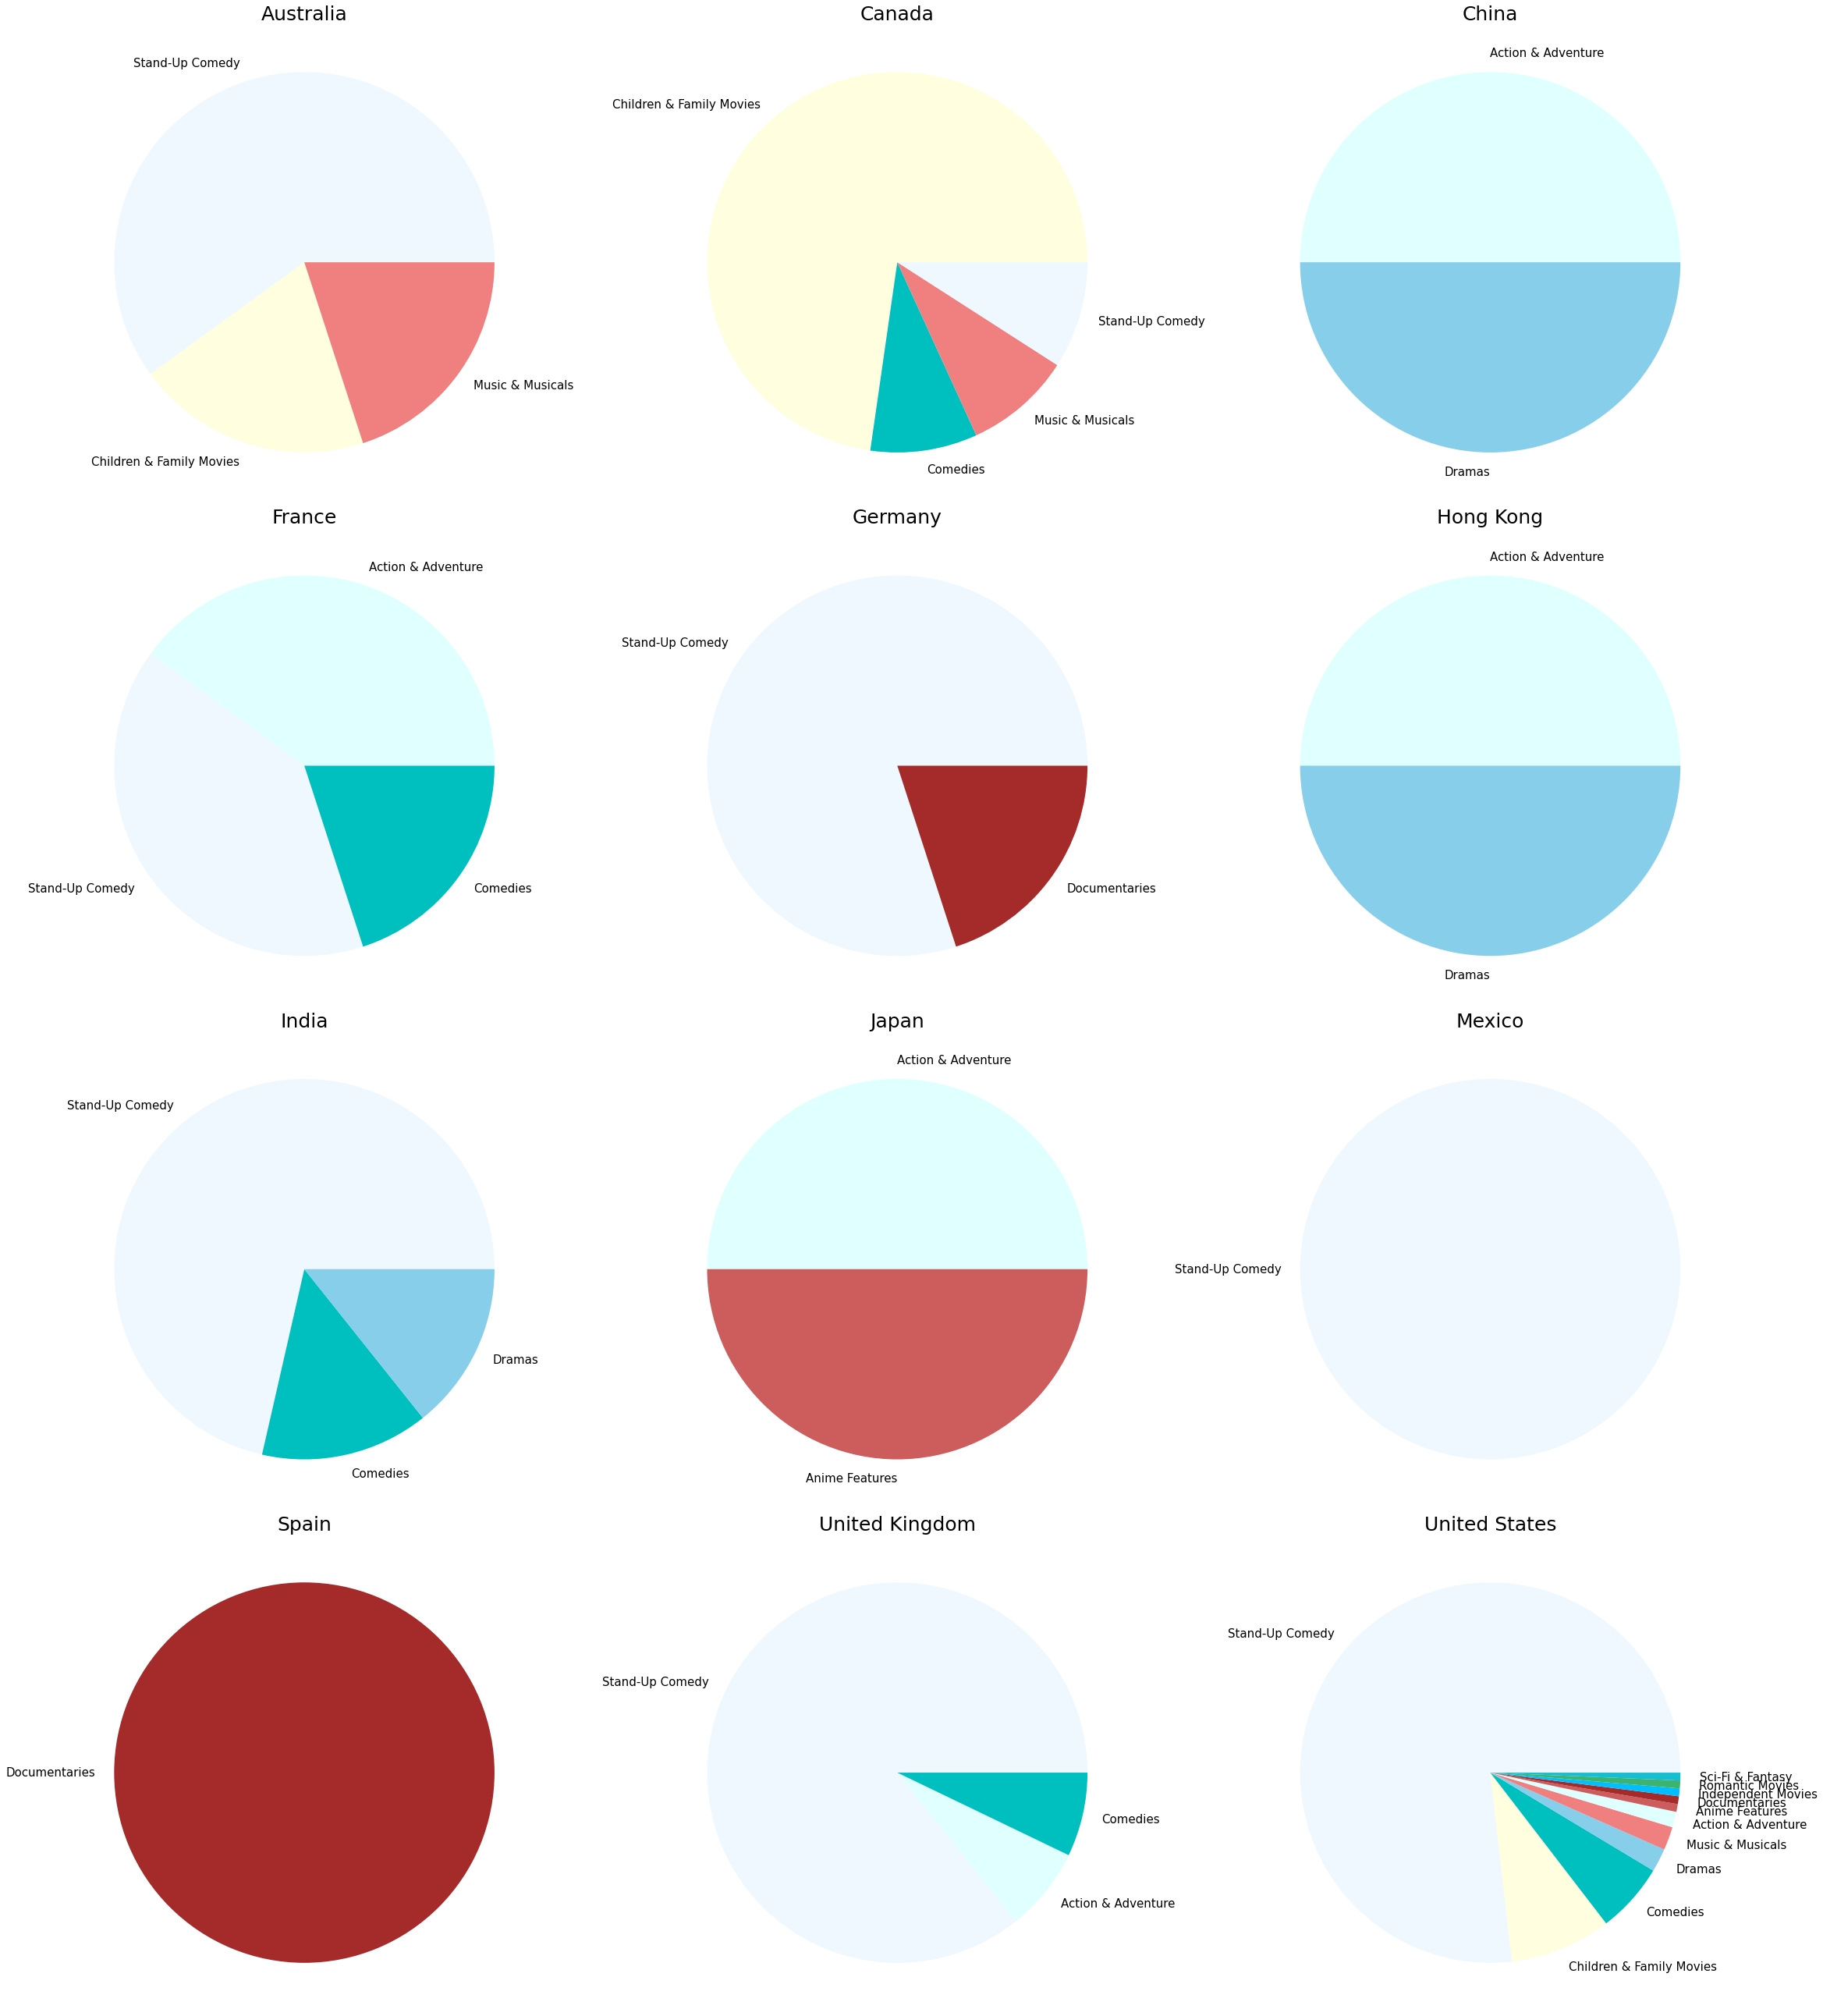

In [35]:
# creating pie charts to see the movie genre breakdown for Netflix originals by the top producing countries
genre_originals_count_15_movies = genre_originals_count_15[(genre_originals_count_15['type'] == 'Movie') & (genre_originals_count_15['value'] != 'International Movies') & (genre_originals_count_15['value'] != 'Movies')]

len(genre_originals_count_15_movies)

colors_dict_movies_og = {'Dramas': 'skyblue', 'Comedies':'c', 'Action & Adventure':'lightcyan', 'Children & Family Movies':'lightyellow', 
               'Independent Movies':'deepskyblue', 'Romantic Movies':'mediumseagreen', 'Thrillers':'mediumaquamarine', 
               'Documentaries':'brown', 'Sci-Fi & Fantasy':'tab:cyan', 'Stand-Up Comedy':'aliceblue', 
               'Horror Movies':'k', 'Music & Musicals':'lightcoral', 'Sports Movies':'dodgerblue', 'Movies':'mistyrose', 
               'International Movies':'tan', 'Anime Features':'indianred'}

fig, axs = plt.subplots(4, 3, figsize=(5*6.5, 3*12), subplot_kw={'aspect':'equal'})

for ax, (name, sub_df) in zip(axs.ravel(), genre_originals_count_15_movies.groupby('unstacked_country')):
    ax.pie(sub_df['count'], labels=sub_df['value'], colors = [colors_dict_movies_og[x] for x in sub_df['value']], textprops={'fontsize':15})
    ax.set_title(name, size=25)
    
plt.tight_layout()


127

([<matplotlib.patches.Wedge at 0x7ffe625c5ca0>,
 [Text(0.7778174593052024, 0.7778174593052023, "Kids' TV"),
  Text(-0.5500000148652439, 0.9526279355804298, 'TV Dramas'),
  Text(-1.0905893519921306, 0.14357877740594202, 'Docuseries'),
  Text(-0.8726886534216935, -0.6696375991452626, 'TV Comedies'),
  Text(-0.2847009081627095, -1.0625184200244853, 'Science & Nature TV'),
  Text(0.2847010076428618, -1.062518393368858, 'TV Action & Adventure'),
  Text(0.7778175139235951, -0.7778174046868057, 'TV Sci-Fi & Fantasy'),
  Text(1.016267520248218, -0.4209516923454971, 'Crime TV Shows'),
  Text(1.090589360393888, -0.14357871358822688, 'Reality TV')])

Text(0.5, 1.0, 'Australia')

([<matplotlib.patches.Wedge at 0x7ffe625ec7f0>,
 [Text(0.6400448207491376, 0.8946187050538371, "Kids' TV"),
  Text(-0.9592543436832603, 0.5383596419911114, 'TV Dramas'),
  Text(-0.8706461153148185, -0.6722911139433689, 'TV Action & Adventure'),
  Text(-0.2782266511141529, -1.0642320849372113, 'TV Comedies'),
  Text(0.19980063028786632, -1.0817022271108494, 'TV Mysteries'),
  Text(0.5730344660255647, -0.9389523421062413, 'Crime TV Shows'),
  Text(0.8192494717428137, -0.7340506134110377, 'TV Sci-Fi & Fantasy'),
  Text(0.9959931057194746, -0.46690227388531286, 'Teen TV Shows'),
  Text(1.0736834878998136, -0.23917309173753454, 'TV Horror'),
  Text(1.097065519569502, -0.08029474311372237, 'TV Thrillers')])

Text(0.5, 1.0, 'Canada')

([<matplotlib.patches.Wedge at 0x7ffe62618460>,
 [Text(6.735557395310444e-17, 1.1, "Kids' TV"),
  Text(-0.7778174593052025, -0.7778174593052023, 'British TV Shows'),
  Text(0.7778174593052023, -0.7778174593052025, 'Reality TV')])

Text(0.5, 1.0, 'China')

([<matplotlib.patches.Wedge at 0x7ffe626204f0>,
 [Text(0.6628980661753352, 0.877818975564439, 'TV Dramas'),
  Text(-0.7410652863598512, 0.8129097375184972, 'Crime TV Shows'),
  Text(-1.0999999999999925, -1.2873679100373929e-07, 'Docuseries'),
  Text(-0.8778188669506842, -0.662898210003178, 'TV Comedies'),
  Text(-0.4903120605223834, -0.9846796856370578, "Kids' TV"),
  Text(-0.1014950483708882, -1.0953076075496742, 'Reality TV'),
  Text(0.30102943256753756, -1.0580081666641645, 'TV Horror'),
  Text(0.6628982202765947, -0.8778188591925578, 'TV Thrillers'),
  Text(0.877819041508493, -0.662897978851279, 'British TV Shows'),
  Text(0.984679688506203, -0.4903120547603608, 'Romantic TV Shows'),
  Text(1.0580082494558274, -0.3010291415850228, 'TV Action & Adventure'),
  Text(1.09530760814359, -0.1014950419615064, 'TV Mysteries')])

Text(0.5, 1.0, 'France')

([<matplotlib.patches.Wedge at 0x7ffe62649c70>,
 [Text(0.5499999702695115, 0.9526279613277875, 'TV Dramas'),
  Text(-1.0433901091385263, 0.3483347242981874, 'Crime TV Shows'),
  Text(-0.8793869877888245, -0.6608165598013551, 'Reality TV'),
  Text(-0.47156172151527115, -0.9937955236373094, 'TV Comedies'),
  Text(-0.04429241571259662, -1.0991079027603898, 'British TV Shows'),
  Text(0.3060393285720684, -1.0565698885389256, 'Docuseries'),
  Text(0.6248713265375822, -0.9052821799147284, "Kids' TV"),
  Text(0.8233619099981863, -0.729434825850904, 'Romantic TV Shows'),
  Text(0.9297091654617328, -0.5879122958881272, 'Stand-Up Comedy & Talk Shows'),
  Text(1.0119774412670206, -0.4311631458817578, 'TV Action & Adventure'),
  Text(1.0680360322287867, -0.2632470965860599, 'TV Mysteries'),
  Text(1.0964330502495654, -0.08851308558871057, 'TV Sci-Fi & Fantasy')])

Text(0.5, 1.0, 'Germany')

([<matplotlib.patches.Wedge at 0x7ffe6267b460>,
 [Text(0.8706461467870358, 0.6722910731854822, 'TV Comedies'),
  Text(-0.4302151495548535, 1.012380820192429, 'TV Dramas'),
  Text(-1.0882776974721118, 0.16016133486206655, 'Crime TV Shows'),
  Text(-0.9592543688856934, -0.5383595970851734, 'Romantic TV Shows'),
  Text(-0.5730344000922664, -0.938952382344758, "Kids' TV"),
  Text(-0.19980055433066232, -1.0817022411408606, 'Docuseries'),
  Text(0.12030830957459915, -1.0934010749250718, 'Reality TV'),
  Text(0.4302151732513362, -1.0123808101225167, 'TV Action & Adventure'),
  Text(0.7036403066856303, -0.8455118679281518, 'TV Horror'),
  Text(0.9173975867938446, -0.60694453432322, 'TV Mysteries'),
  Text(1.0274177109428038, -0.39295400143152814, 'British TV Shows'),
  Text(1.073683459908555, -0.2391732173944124, 'Stand-Up Comedy & Talk Shows'),
  Text(1.097065510172324, -0.08029487150708109, 'Teen TV Shows')])

Text(0.5, 1.0, 'India')

([<matplotlib.patches.Wedge at 0x7ffe626b4040>,
 [Text(0.8202063960771941, 0.732981219291505, 'Anime Series'),
  Text(-0.5320907243078979, 0.9627457925670185, 'TV Dramas'),
  Text(-1.0982694923948362, 0.0616775654090621, 'Reality TV'),
  Text(-0.8971169941675602, -0.6365383718015449, 'TV Comedies'),
  Text(-0.4772721561105116, -0.9910657339458486, 'Crime TV Shows'),
  Text(-2.5747358136657987e-08, -1.0999999999999999, 'TV Mysteries'),
  Text(0.42095176370787, -1.0162674906889593, 'Romantic TV Shows'),
  Text(0.7329812288906625, -0.8202063874988627, 'TV Action & Adventure'),
  Text(0.9313966181726541, -0.5852352857240782, "Kids' TV"),
  Text(1.0382716663762805, -0.3633069594712191, 'TV Horror'),
  Text(1.0844581232966313, -0.18425682841064225, 'Docuseries'),
  Text(1.0982694978085854, -0.06167746900836396, 'TV Thrillers')])

Text(0.5, 1.0, 'Japan')

([<matplotlib.patches.Wedge at 0x7ffe626cf6d0>,
 [Text(0.4452616659030206, 1.0058538904220966, 'Spanish-Language TV Shows'),
  Text(-1.1, 1.3471114790620887e-16, 'Crime TV Shows'),
  Text(-0.3799015795884042, -1.0323152569957665, 'TV Dramas'),
  Text(0.312980323633399, -1.0545346447691195, 'TV Action & Adventure'),
  Text(0.6858387576009194, -0.8600146502080226, 'Docuseries'),
  Text(0.8815549618979454, -0.6579216132284396, "Kids' TV"),
  Text(1.019608417009931, -0.41279374506223165, 'Reality TV'),
  Text(1.079715063675187, -0.21027453786154648, 'Stand-Up Comedy & Talk Shows'),
  Text(1.0977399288186729, -0.07047729192566367, 'TV Comedies')])

Text(0.5, 1.0, 'Mexico')

([<matplotlib.patches.Wedge at 0x7ffe626fe1f0>,
 [Text(0.33991867422268784, 1.0461621742897658, 'Korean TV Shows'),
  Text(-1.0654414851813472, 0.2735588449576529, 'Romantic TV Shows'),
  Text(-0.9639373415982301, -0.5299290532444292, 'TV Dramas'),
  Text(-0.46835722258533263, -0.9953097568356062, 'Crime TV Shows'),
  Text(0.06906955709217517, -1.097829402176445, "Kids' TV"),
  Text(0.589409451868114, -0.9287607324001858, 'Reality TV'),
  Text(0.9639373291943449, -0.5299290758070114, 'TV Comedies'),
  Text(1.0913261653791653, -0.13786660494408046, 'TV Mysteries')])

Text(0.5, 1.0, 'South Korea')

([<matplotlib.patches.Wedge at 0x7ffe6270d760>,
 [Text(0.4018751039768062, 1.0239611324672588, 'Spanish-Language TV Shows'),
  Text(-1.0724206837565986, -0.24477311341532135, 'Crime TV Shows'),
  Text(-0.16394635579591865, -1.0877139294967395, 'Docuseries'),
  Text(0.24477317616986494, -1.0724206694332763, 'British TV Shows'),
  Text(0.5500001375035027, -0.9526278647751851, 'Reality TV'),
  Text(0.8063571711771605, -0.7481898906635718, 'Romantic TV Shows'),
  Text(0.991065828902398, -0.4772719589311768, 'TV Dramas'),
  Text(1.0724207424821819, -0.24477285612168315, 'Anime Series'),
  Text(1.0969241902534712, -0.08220292474581797, 'TV Comedies')])

Text(0.5, 1.0, 'Spain')

([<matplotlib.patches.Wedge at 0x7ffe62738130>,
 [Text(0.5204028840537455, 0.9691134290002095, 'British TV Shows'),
  Text(-0.897816641803129, 0.6355511605695894, 'TV Dramas'),
  Text(-1.0953075873565166, -0.10149526628984659, 'Docuseries'),
  Text(-0.8129097548643817, -0.7410652673323255, 'Crime TV Shows'),
  Text(-0.30102919730507977, -1.0580082336021113, 'TV Comedies'),
  Text(0.2021245842329296, -1.081270388223346, 'Reality TV'),
  Text(0.5790754905508582, -0.9352387803354196, "Kids' TV"),
  Text(0.835345497169887, -0.7156800265188309, 'TV Action & Adventure'),
  Text(0.9846796827679123, -0.49031206628440605, 'Romantic TV Shows'),
  Text(1.0580082459327798, -0.3010291539672573, 'Science & Nature TV'),
  Text(1.0916625782430194, -0.13517697756572286, 'TV Sci-Fi & Fantasy'),
  Text(1.0994782962068943, -0.033874417633143826, 'Stand-Up Comedy & Talk Shows')])

Text(0.5, 1.0, 'United Kingdom')

([<matplotlib.patches.Wedge at 0x7ffe627579a0>,
 [Text(0.9452851722783189, 0.562526393221464, 'TV Comedies'),
  Text(0.0677169413191482, 1.0979136650294408, 'Docuseries'),
  Text(-0.7692146766790281, 0.7863261290212723, 'TV Dramas'),
  Text(-1.0979136697845264, 0.06771686422357616, "Kids' TV"),
  Text(-0.9428008534475064, -0.5666802897036862, 'Reality TV'),
  Text(-0.5458029950787802, -0.9550387900829125, 'Crime TV Shows'),
  Text(-0.12556522793490227, -1.0928098524142507, 'TV Action & Adventure'),
  Text(0.17351206176340594, -1.086229057069738, 'Science & Nature TV'),
  Text(0.40187530770088864, -1.0239610525114304, 'TV Mysteries'),
  Text(0.6035611482755066, -0.9196270658763541, 'Stand-Up Comedy & Talk Shows'),
  Text(0.7692147549015125, -0.7863260525010005, 'TV Sci-Fi & Fantasy'),
  Text(0.8921892007147829, -0.6434270977569384, 'TV Horror'),
  Text(0.9825128249061891, -0.4946398173366763, 'Teen TV Shows'),
  Text(1.0422052062001137, -0.3518640478499881, 'Romantic TV Shows'),
  Text(

Text(0.5, 1.0, 'United States')

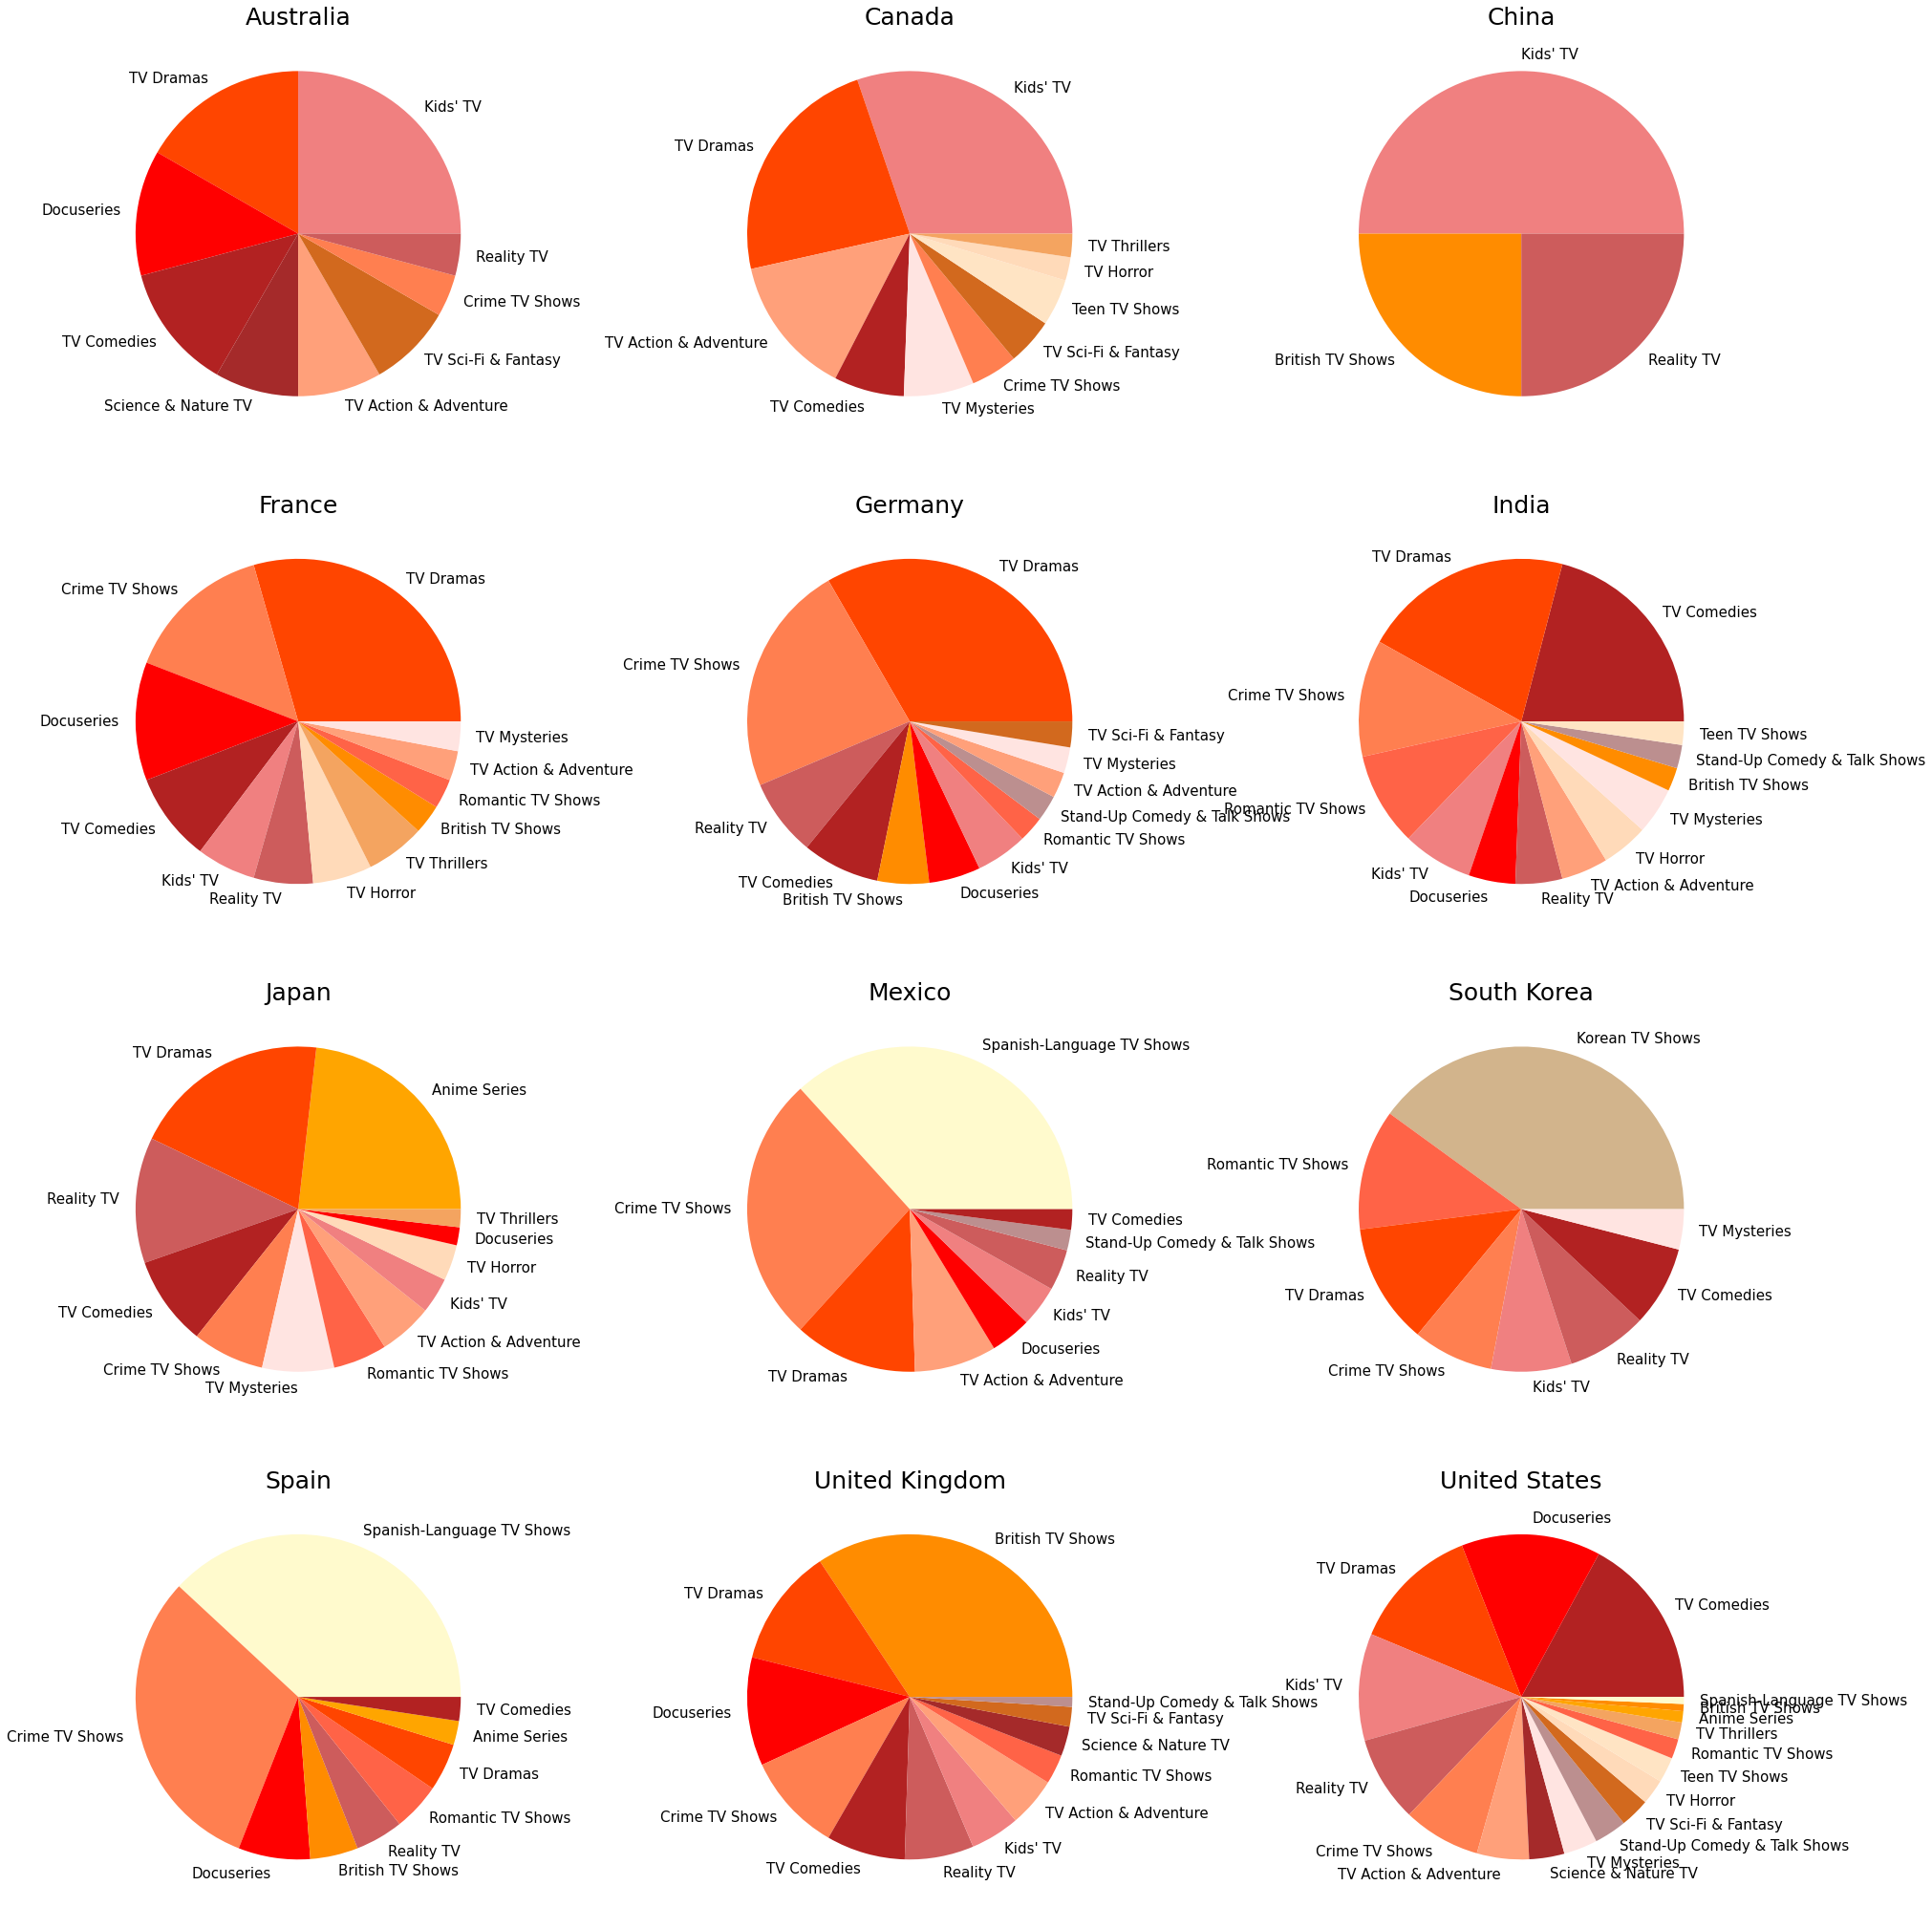

In [37]:
# creating pie charts to see the tv genre breakdown for Netflix originals by the top producing countries
top_12 = country_counts.loc[:11, 'index'].values

genre_originals_count_12 = genre_originals_count[genre_originals_count['unstacked_country'].isin(top_12)]
genre_originals_count_12_tv = genre_originals_count_12[(genre_originals_count_12['type'] == 'TV Show') & (genre_originals_count_12['value'] != 'International TV Shows')]

len(genre_originals_count_12_tv)

colors_dict_tv_og = {'TV Dramas': 'orangered', 'TV Comedies':'firebrick', 'Kids\' TV':'lightcoral', 'Crime TV Shows':'coral', 
               'Docuseries':'red', 'Romantic TV Shows':'tomato', 'Reality TV':'indianred', 
               'British TV Shows':'darkorange', 'Anime Series':'orange', 'TV Action & Adventure':'lightsalmon', 'TV Mysteries': 'mistyrose',
               'Korean TV Shows': 'tan', 'TV Horror':'peachpuff', 'Stand-Up Comedy & Talk Shows': 'rosybrown',
               'Spanish-Language TV Shows':'lemonchiffon', 'TV Sci-Fi & Fantasy':'chocolate', 'TV Thrillers': 'sandybrown',
               'Teen TV Shows':'bisque', 'Science & Nature TV':'brown'}


fig, axs = plt.subplots(4, 3, figsize=(5*6.5, 3*12), subplot_kw={'aspect':'equal'})

for ax, (name, sub_df) in zip(axs.ravel(), genre_originals_count_12_tv.groupby('unstacked_country')):
    ax.pie(sub_df['count'], labels=sub_df['value'], colors = [colors_dict_tv_og[x] for x in sub_df['value']], textprops={'fontsize':15})
    ax.set_title(name, size=25)
    
    

#### Ratings Metrics

In [38]:
# skipping content age metrics due to originals being made for Netflix, thus releasing and being added simultaenously
# caculating the age groups counts based on ratings for the top 25 countries, Netflix originals
rating_counts_og = genre_just_originals.groupby(['unstacked_country'])['age_group'].value_counts().reset_index(name = 'counts')
rating_counts_25_og = rating_counts_og[rating_counts_og['unstacked_country'].isin(top_25)]

# checking the average content age for the top 25 countries
rating_counts_25_og


,unstacked_country,age_group,counts
0,Argentina,adults,10
1,Argentina,teens,4
2,Australia,adults,9
3,Australia,young kids,5
4,Australia,teens,4
5,Australia,older kids,1
7,Belgium,adults,2
8,Brazil,adults,22
9,Brazil,teens,5
10,Canada,young kids,11


In [39]:
# creating a table to chart relative age group distributions by country for Netflix originals
ratings_total = rating_counts_25_og.groupby('unstacked_country')['counts'].sum().reset_index(name="total_count_country")
rating_counts_25_og = rating_counts_25_og.merge(ratings_total, on="unstacked_country")

rating_counts_25_og['percentage'] = rating_counts_25_og['counts']/rating_counts_25_og['total_count_country'] * 100
rating_counts_25_og = rating_counts_25_og.drop(columns='total_count_country')
total_by_region_og = pd.pivot_table(rating_counts_25_og, index='unstacked_country', columns = 'age_group', values = 'percentage')

# taking a look at the new table
total_by_region_og


age_group,adults,older kids,teens,young kids
unstacked_country,,,,
Argentina,71.428571,NaN,28.571429,NaN
Australia,47.368421,5.263158,21.052632,26.315789
Belgium,100.000000,NaN,NaN,NaN
Brazil,81.481481,NaN,18.518519,NaN
Canada,15.151515,30.303030,21.212121,33.333333
China,NaN,25.000000,50.000000,25.000000
Egypt,NaN,NaN,100.000000,NaN
France,83.333333,4.166667,8.333333,4.166667
Germany,72.413793,10.344828,17.241379,NaN


In [40]:
# plotting the ratings distribution for Netflix originals by country
# total_by_region_og.plot.bar(stacked=True, figsize=(12,6), color=['mediumblue', 'limegreen', 'darkviolet', 'orangered'])
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.tight_layout()


## Conclusion

It seems like Netflix is going global by concentrating on English-speaking countries, Western Europe, Spanish-speaking countries, and APAC countries in its international expansion. It also seems like Netflix is heavily investing in TV instead of Movies for originally-produced content, tailored to linguistically-/culturally-similiar regions.

By comparing and contrasting metrics between the Netflix US Content Library superset and Netflix originals, we can uncover not only Netflix's potential business strategy in expanding internationally, but make inferences on what may be next in the world of streaming.